---

## Read the OSA data 

In [1]:
# Import pandas
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)

# Assign spreadsheet filename to `file`
file = 'Info_BDApnea_QuironMalaga_rev1.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Hoja1', 'Hoja2']


In [2]:
df_tmp = xl.parse('Hoja1')

In [3]:
df_tmp

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,Peso,Talla,IMC,Edad,PerCervical,Fumador,Roncador,Enfermedades,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
0,P0001,es el Patient0002 (fotos) 3 (sentado) y 4 (tum...,si,si,16,hombre,NaN,71.0,-1,-1,82.0,168.0,-1.0,39.0,-1.0,ns,ns,Septo_Nasal_Desviado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P0002,Es el Patient0006 (sentado) y 7 (tumbado),si,si,16,hombre,NaN,29.6,-1,-1,119.0,174.0,-1.0,56.0,48.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P0003,"Patient 8, 9 y 10",si,si,16,hombre,NaN,56.0,-1,-1,-1.0,-1.0,-1.0,46.0,43.0,si,ns,nd,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P0004,Patient 13 y 14,si_codigos,si,16,hombre,NaN,19.7,-1,-1,78.0,168.0,-1.0,39.0,42.0,no,ns,Hiperactividad_bronquial,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P0005,Patient0015 los códigos QMH5,si_codigos,si,16,hombre,NaN,9.0,-1,-1,80.0,173.0,-1.0,32.0,40.0,no,ns,Septo_Nasal_Desviado_Operado,nd,nd,nd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,P0679,QMH688(patient0753) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,9.2,15.9,7.3,105.0,180.0,-1.0,35.0,45.0,no,si,Apnea,443,nd,andaluz/Málaga,10.860,15.019,no,no,1,1.0,1.0
679,P0680,QMH689(patient0754),NO_UNAREP,si,55/16,hombre,NaN,52.2,53.4,50.3,90.0,180.0,-1.0,50.0,42.0,no,si,no,442,nd,Mezcla,10.268,14.383,si,no,1,0.0,0.0
680,P0681,QMH690(patient0755) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,NaN,NO disponible,NaN,94.0,177.0,-1.0,44.0,44.0,no,si,Apnea,434,nd,andaluz/Málaga,9.181,14.35,no,no,1,1.0,0.0
681,P0682,QMH691(patient0756),NO_UNAREP,si,55/16,mujer,NaN,5.4,NaN,este sobre todo,66.0,164.0,-1.0,57.0,35.0,si,si,Lupus,436,nd,andaluz/Málaga,8.543,11.956,si,si,1,0.0,1.0


### Generate a report with Pandas-Profiling

In [5]:
# Generate a report with pandas_profiling
report = pandas_profiling.ProfileReport(df_tmp)
report

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,28
Number of observations,683
Total Missing (%),24.6%
Total size in memory,149.5 KiB
Average record size in memory,224.2 B
Numeric,8
Categorical,18
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [152]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 28 columns):
Patient           683 non-null object
Comentarios       683 non-null object
Audios_tumbado    683 non-null object
Fotos             683 non-null object
Audio_fs_KHz      683 non-null object
Gender            683 non-null object
EPWORTH           55 non-null object
IAH               649 non-null float64
IAH_Supino        588 non-null object
IAH_Lateral       525 non-null object
Peso              676 non-null float64
Talla             677 non-null float64
IMC               678 non-null float64
Edad              678 non-null float64
PerCervical       678 non-null float64
Fumador           680 non-null object
Roncador          680 non-null object
Enfermedades      678 non-null object
Sala/Ruidos       680 non-null object
Imagen            680 non-null object
Dialecto          680 non-null object
DIST_EXT_OJOS     305 non-null float64
DIST_BARB-LOB     305 non-null object
Cansancio      

## Select columns to analyze 

In [6]:
columns = ['Patient', 'Gender', 'IAH', 'Peso', 'Talla', 
           'Edad', 'Fumador', 'PerCervical']
df_tmp1 = pd.DataFrame(df_tmp, columns=columns)

In [7]:
df_tmp1

,Patient,Gender,IAH,Peso,Talla,Edad,Fumador,PerCervical
0,P0001,hombre,71.0,82.0,168.0,39.0,ns,-1.0
1,P0002,hombre,29.6,119.0,174.0,56.0,si,48.0
2,P0003,hombre,56.0,-1.0,-1.0,46.0,si,43.0
3,P0004,hombre,19.7,78.0,168.0,39.0,no,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,no,40.0
...,...,...,...,...,...,...,...,...
678,P0679,hombre,9.2,105.0,180.0,35.0,no,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,no,42.0
680,P0681,hombre,NaN,94.0,177.0,44.0,no,44.0
681,P0682,mujer,5.4,66.0,164.0,57.0,si,35.0


## Look for NaN and -1 rows 

In [8]:
for column in df_tmp1.columns.values:
    print('\033[1m' + str(column) + '\033[0m')
    print("Number of NaN values:")
    print(df_tmp1[column].isnull().sum())
    print("Number of -1 values:")
    print(df_tmp1[df_tmp1[column]==-1].shape[0])
    print("")

Patient
Number of NaN values:
0
Number of -1 values:
0

Gender
Number of NaN values:
0
Number of -1 values:
0

IAH
Number of NaN values:
34
Number of -1 values:
0

Peso
Number of NaN values:
7
Number of -1 values:
1

Talla
Number of NaN values:
6
Number of -1 values:
1

Edad
Number of NaN values:
5
Number of -1 values:
3

Fumador
Number of NaN values:
3
Number of -1 values:
0

PerCervical
Number of NaN values:
5
Number of -1 values:
7



In [156]:
df_tmp1 = df_tmp1.replace(-1, np.nan)

## Label encoding 'Fumador'
    0 -> no fumador
    1 -> antiguo fumador
    2 -> poco fumador
    3 -> sí fumador

In [9]:
df_tmp1['Fumador'].value_counts(dropna=False)

no           373
si           165
antiguo      119
ns            16
poco           6
NaN            3
si (poco)      1
Name: Fumador, dtype: int64

In [10]:
df_tmp1 = df_tmp1.replace('ns', np.nan)
df_tmp1 = df_tmp1.replace('si (poco)', 'poco')

In [11]:
df_tmp1['Fumador'].value_counts(dropna=False)

no         373
si         165
antiguo    119
NaN         19
poco         7
Name: Fumador, dtype: int64

In [12]:
df_tmp1['Fumador'] = df_tmp1['Fumador'].astype('category')
df_tmp1['Fumador'] = df_tmp1['Fumador'].cat.codes

In [13]:
df_tmp1['Fumador'] = df_tmp1['Fumador'].replace(1.0, 4.0)
df_tmp1['Fumador'] = df_tmp1['Fumador'].replace(0.0, 1.0)
df_tmp1['Fumador'] = df_tmp1['Fumador'].replace(4.0, 0.0)

In [162]:
df_tmp1['Fumador'].value_counts(dropna=False)

 0.0    373
 3.0    165
 1.0    119
-1.0     19
 2.0      7
Name: Fumador, dtype: int64

## Select only  'Gender'==hombre

In [14]:
df_tmp1 = df_tmp1[df_tmp1['Gender']=='hombre']

In [15]:
df_tmp1

,Patient,Gender,IAH,Peso,Talla,Edad,Fumador,PerCervical
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0,-1.0
1,P0002,hombre,29.6,119.0,174.0,56.0,3.0,48.0
2,P0003,hombre,56.0,-1.0,-1.0,46.0,3.0,43.0
3,P0004,hombre,19.7,78.0,168.0,39.0,0.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,0.0,40.0
...,...,...,...,...,...,...,...,...
675,P0676,hombre,27.9,75.0,171.0,83.0,0.0,40.0
677,P0678,hombre,NaN,92.0,163.0,83.0,1.0,44.0
678,P0679,hombre,9.2,105.0,180.0,35.0,0.0,45.0
679,P0680,hombre,52.2,90.0,180.0,50.0,0.0,42.0


### Adding BMI and log(IAH)

In [16]:
df_tmp1['BMI'] = df_tmp1['Peso']/((df_tmp1['Talla']/100)**2)
#df_IAH = df_final['IAH'].to_numpy()
#df_final['log_IAH'] = df_final['IAH'].apply(lambda row: np.log10(row+1))
#df_final = df_final.drop(['IAH'],axis=1)
df_tmp1

,Patient,Gender,IAH,Peso,Talla,Edad,Fumador,PerCervical,BMI
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0,-1.0,29.053288
1,P0002,hombre,29.6,119.0,174.0,56.0,3.0,48.0,39.305060
2,P0003,hombre,56.0,-1.0,-1.0,46.0,3.0,43.0,-10000.000000
3,P0004,hombre,19.7,78.0,168.0,39.0,0.0,42.0,27.636054
4,P0005,hombre,9.0,80.0,173.0,32.0,0.0,40.0,26.729927
...,...,...,...,...,...,...,...,...,...
675,P0676,hombre,27.9,75.0,171.0,83.0,0.0,40.0,25.648918
677,P0678,hombre,NaN,92.0,163.0,83.0,1.0,44.0,34.626821
678,P0679,hombre,9.2,105.0,180.0,35.0,0.0,45.0,32.407407
679,P0680,hombre,52.2,90.0,180.0,50.0,0.0,42.0,27.777778


In [17]:
df_tmp1.describe()

,IAH,Peso,Talla,Edad,Fumador,PerCervical,BMI
count,463.000000,486.000000,486.000000,486.000000,488.000000,486.000000,486.000000
mean,22.610497,91.430041,175.115226,48.604938,0.911885,41.512346,9.092144
std,18.499934,17.529658,10.868051,13.122747,1.273011,6.033143,454.985846
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-10000.000000
25%,8.700000,80.000000,170.000000,39.000000,0.000000,40.000000,26.173833
50%,17.200000,88.500000,175.000000,48.000000,0.000000,42.000000,28.734672
75%,33.050000,100.000000,180.000000,58.000000,2.000000,44.000000,32.203801
max,102.000000,162.000000,199.000000,85.000000,3.000000,53.000000,52.298554


### Adding OSA column (classification target)
    IAH <= 10     ->     HEALTHY    ->     0
    IAH >= 30     ->     SEVERE     ->     1

In [18]:
df_tmp1['OSA'] = np.where(df_tmp1['IAH'] <= 10, 0, 
                 np.where(df_tmp1['IAH'] >= 30, 1, np.nan))
df_tmp1

,Patient,Gender,IAH,Peso,Talla,Edad,Fumador,PerCervical,BMI,OSA
0,P0001,hombre,71.0,82.0,168.0,39.0,-1.0,-1.0,29.053288,1.0
1,P0002,hombre,29.6,119.0,174.0,56.0,3.0,48.0,39.305060,NaN
2,P0003,hombre,56.0,-1.0,-1.0,46.0,3.0,43.0,-10000.000000,1.0
3,P0004,hombre,19.7,78.0,168.0,39.0,0.0,42.0,27.636054,NaN
4,P0005,hombre,9.0,80.0,173.0,32.0,0.0,40.0,26.729927,0.0
...,...,...,...,...,...,...,...,...,...,...
675,P0676,hombre,27.9,75.0,171.0,83.0,0.0,40.0,25.648918,NaN
677,P0678,hombre,NaN,92.0,163.0,83.0,1.0,44.0,34.626821,NaN
678,P0679,hombre,9.2,105.0,180.0,35.0,0.0,45.0,32.407407,0.0
679,P0680,hombre,52.2,90.0,180.0,50.0,0.0,42.0,27.777778,1.0


### Drop out all rows with NAN or -1

In [19]:
df_final = df_tmp1.dropna()
df_final = df_final[df_final['Fumador'] != -1]
df_final

,Patient,Gender,IAH,Peso,Talla,Edad,Fumador,PerCervical,BMI,OSA
2,P0003,hombre,56.0,-1.0,-1.0,46.0,3.0,43.0,-10000.000000,1.0
4,P0005,hombre,9.0,80.0,173.0,32.0,0.0,40.0,26.729927,0.0
5,P0006,hombre,2.0,109.0,190.0,32.0,0.0,42.0,30.193906,0.0
6,P0007,hombre,34.0,86.0,169.0,39.0,0.0,42.0,30.110991,1.0
7,P0008,hombre,60.0,145.0,172.0,47.0,0.0,44.0,49.012980,1.0
...,...,...,...,...,...,...,...,...,...,...
667,P0668,hombre,41.5,113.0,180.0,44.0,3.0,44.0,34.876543,1.0
668,P0669,hombre,2.7,85.0,180.0,33.0,0.0,40.0,26.234568,0.0
673,P0674,hombre,33.0,90.0,179.0,57.0,0.0,42.0,28.089011,1.0
678,P0679,hombre,9.2,105.0,180.0,35.0,0.0,45.0,32.407407,0.0


In [20]:
df_final = df_final.rename(columns = {"Talla": "Height", 
                                "Peso":"Weight", 
                                "Edad": "Age",
                                "Fumador": "Smoker",
                                "IAH": "AHI",
                                "PerCervical": "Cervical"})
columns = ['Patient', 'Weight', 'Height', 
           'Age', 'Smoker', 'Cervical', 'BMI', 'OSA']
df_final = pd.DataFrame(df_final, columns=columns)

In [21]:
df_final = df_final.reset_index()
df_final = df_final.drop(['index'],axis=1)
df_final

,Patient,Weight,Height,Age,Smoker,Cervical,BMI,OSA
0,P0003,-1.0,-1.0,46.0,3.0,43.0,-10000.000000,1.0
1,P0005,80.0,173.0,32.0,0.0,40.0,26.729927,0.0
2,P0006,109.0,190.0,32.0,0.0,42.0,30.193906,0.0
3,P0007,86.0,169.0,39.0,0.0,42.0,30.110991,1.0
4,P0008,145.0,172.0,47.0,0.0,44.0,49.012980,1.0
...,...,...,...,...,...,...,...,...
273,P0668,113.0,180.0,44.0,3.0,44.0,34.876543,1.0
274,P0669,85.0,180.0,33.0,0.0,40.0,26.234568,0.0
275,P0674,90.0,179.0,57.0,0.0,42.0,28.089011,1.0
276,P0679,105.0,180.0,35.0,0.0,45.0,32.407407,0.0


### Generate a report with Pandas-Profiling

In [24]:
# Generate a report with pandas_profiling
report_final = pandas_profiling.ProfileReport(df_final)
report_final

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,278
Total Missing (%),0.0%
Total size in memory,17.5 KiB
Average record size in memory,64.5 B
Numeric,6
Categorical,0
Boolean,1
Date,0
Text (Unique),1
Rejected,0


## Write to an Excel file

In [25]:
df_final.to_excel (r'OSA_DB_Classification.xlsx', index = None, header=True) 

In [26]:
# We will use OSA_df name
OSA_df = df_final

In [27]:
OSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 8 columns):
Patient     278 non-null object
Weight      278 non-null float64
Height      278 non-null float64
Age         278 non-null float64
Smoker      278 non-null float64
Cervical    278 non-null float64
BMI         278 non-null float64
OSA         278 non-null float64
dtypes: float64(7), object(1)
memory usage: 17.5+ KB


In [28]:
OSA_df.iloc[0:4,]

,Patient,Weight,Height,Age,Smoker,Cervical,BMI,OSA
0,P0003,-1.0,-1.0,46.0,3.0,43.0,-10000.000000,1.0
1,P0005,80.0,173.0,32.0,0.0,40.0,26.729927,0.0
2,P0006,109.0,190.0,32.0,0.0,42.0,30.193906,0.0
3,P0007,86.0,169.0,39.0,0.0,42.0,30.110991,1.0


### Setting 'Patient' as index

In [29]:
OSA_df.set_index("Patient", inplace=True)

In [30]:
OSA_df.index

Index(['P0003', 'P0005', 'P0006', 'P0007', 'P0008', 'P0012', 'P0020', 'P0022',
       'P0024', 'P0025',
       ...
       'P0654', 'P0657', 'P0659', 'P0662', 'P0663', 'P0668', 'P0669', 'P0674',
       'P0679', 'P0680'],
      dtype='object', name='Patient', length=278)

In [31]:
OSA_df

,Weight,Height,Age,Smoker,Cervical,BMI,OSA
Patient,,,,,,,
P0003,-1.0,-1.0,46.0,3.0,43.0,-10000.000000,1.0
P0005,80.0,173.0,32.0,0.0,40.0,26.729927,0.0
P0006,109.0,190.0,32.0,0.0,42.0,30.193906,0.0
P0007,86.0,169.0,39.0,0.0,42.0,30.110991,1.0
P0008,145.0,172.0,47.0,0.0,44.0,49.012980,1.0
...,...,...,...,...,...,...,...
P0668,113.0,180.0,44.0,3.0,44.0,34.876543,1.0
P0669,85.0,180.0,33.0,0.0,40.0,26.234568,0.0
P0674,90.0,179.0,57.0,0.0,42.0,28.089011,1.0


## Exploratory Data Analysis

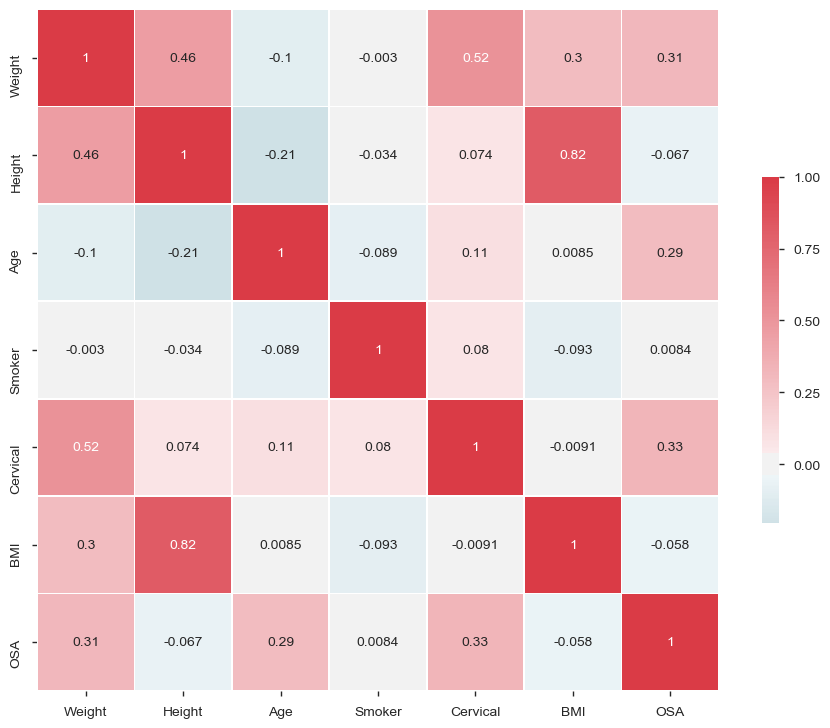

In [32]:
corr = df_final.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm = sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

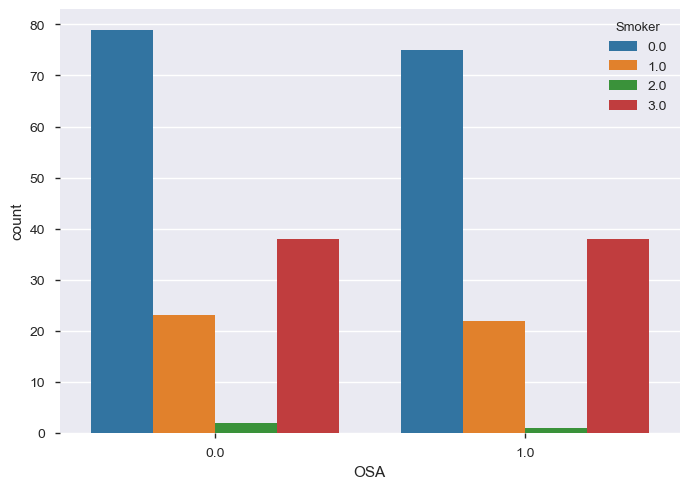

In [33]:
sns.countplot(x="OSA", data=OSA_df, hue = "Smoker")

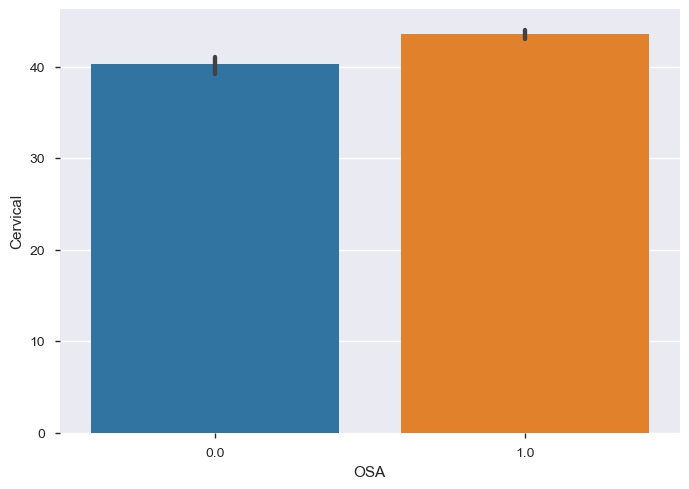

In [34]:
sns.barplot(x="OSA", y="Cervical", data=OSA_df)

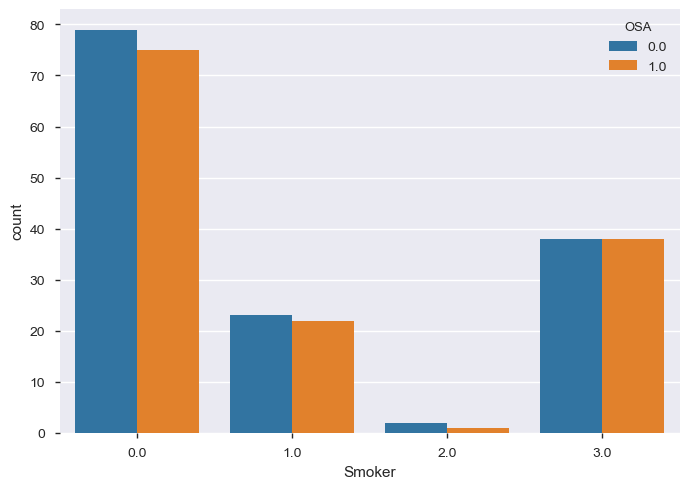

In [35]:
sns.countplot(x="Smoker", data=OSA_df, hue="OSA")

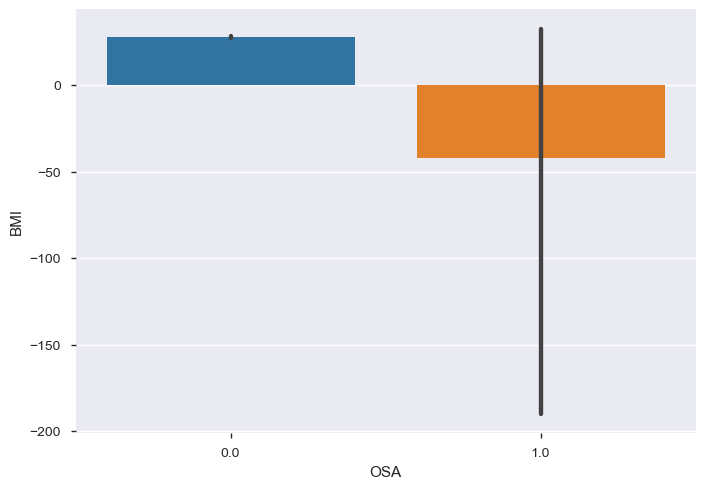

In [36]:
sns.barplot(x="OSA", y="BMI", data=OSA_df)

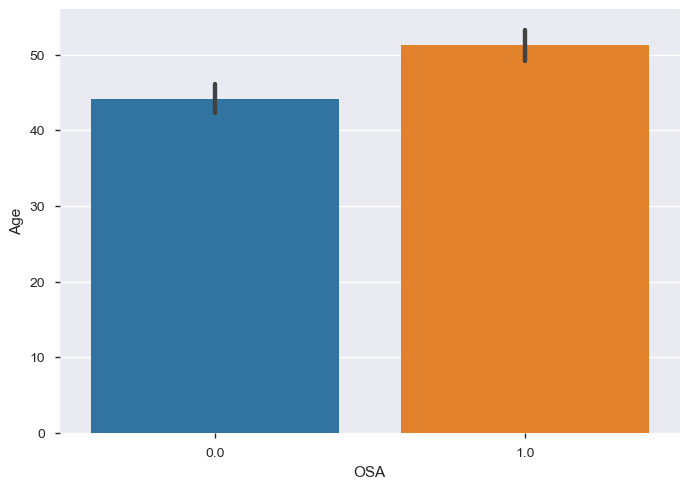

In [37]:
sns.barplot(x="OSA", y="Age", data=OSA_df)

Text(0, 0.5, 'BMI')

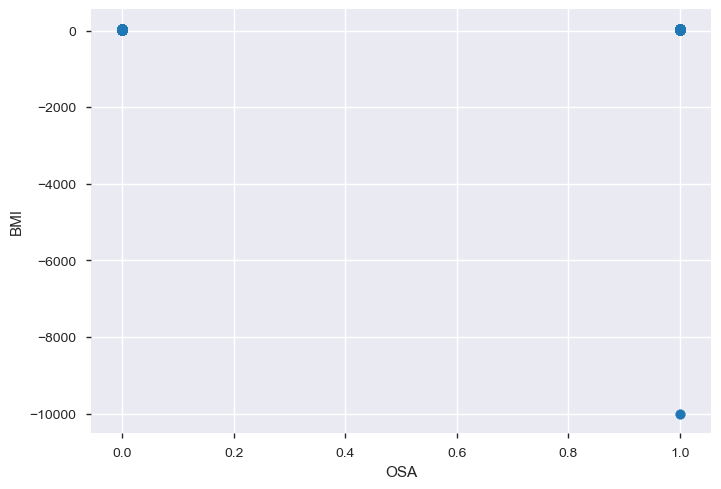

In [38]:
# Relationship between OSA and BMI
plt.scatter(OSA_df['OSA'],OSA_df['BMI'])
plt.xlabel('OSA') 
plt.ylabel('BMI') 

Text(0, 0.5, 'Cervical')

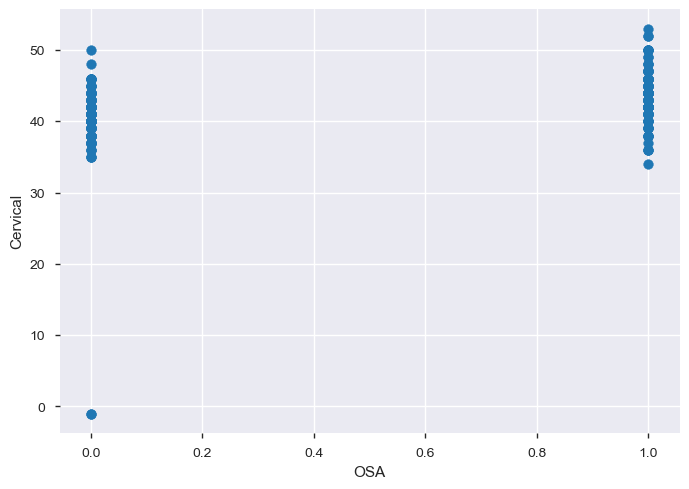

In [39]:
# Relationship between OSA and Cervical
plt.scatter(OSA_df['OSA'],OSA_df['Cervical'])
plt.xlabel('OSA') 
plt.ylabel('Cervical') 

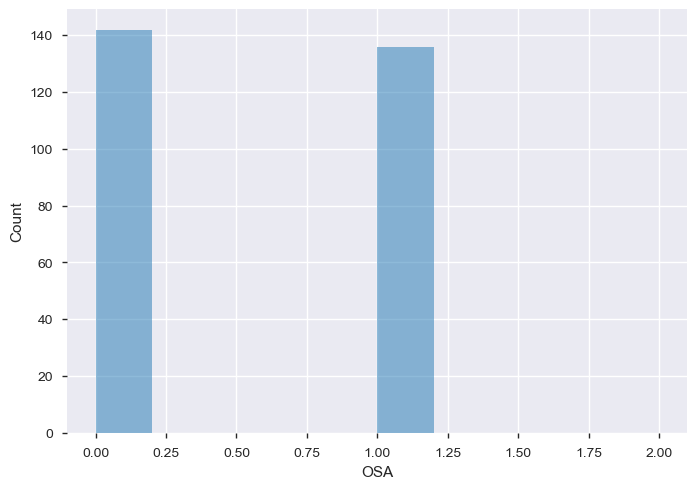

In [40]:
# Histogram of OSA
plt.hist(OSA_df['OSA'], 
         range=(OSA_df['OSA'].min(),
                OSA_df['OSA'].max()+1), 
         alpha=0.5) 
plt.xlabel('OSA') 
plt.ylabel('Count') 
plt.show()

<font size= 5>----------------------------------------------------------------</font>
<font size= 5>----------------------------------------------------------------

## ML models using ScikitLearn

</font>



## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

In [41]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = OSA_df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["OSA"]]

# Store the variable we'll be predicting on.
target = "OSA"

print('Predictors: ',columns)
print('')
print('Target: ',target)

Predictors:  ['Weight', 'Height', 'Age', 'Smoker', 'Cervical', 'BMI']

Target:  OSA


In [42]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

X = OSA_df.loc[:, columns]
y = OSA_df.loc[:, target]

# Polynomial features
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

# StandardScaler
sc_std_X = StandardScaler()
X_std_sc = sc_std_X.fit_transform(X)

# MinMaxScaler
sc_X = MinMaxScaler()
X_sc = sc_X.fit_transform(X)

# Print the shapes of both sets.
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))
print('Polynomial features X: ' + str(X_poly.shape))
print('StandardScaler X: ' + str(X_std_sc.shape))
print('MinMaxScaler X: ' + str(X_sc.shape))

X: (278, 6)
y: (278,)
Polynomial features X: (278, 28)
StandardScaler X: (278, 6)
MinMaxScaler X: (278, 6)


## Models:

In [44]:
### Selecting the model

from sklearn import linear_model, discriminant_analysis, kernel_ridge
from sklearn import svm, neighbors, gaussian_process, cross_decomposition
from sklearn import tree, ensemble, neural_network, naive_bayes
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import xgboost
import catboost

kernel = DotProduct() + WhiteKernel()

model_list = {"Logistic_Regression_Classifier": linear_model.LogisticRegression(solver='lbfgs'),
              "Ridge_Classifier": linear_model.RidgeClassifier(),
              "SGD_Classifier": linear_model.SGDClassifier(),
              "Perceptron": linear_model.Perceptron(tol=1e-3, random_state=0),
              "Passive_Aggressive_Classifier": linear_model.PassiveAggressiveClassifier(random_state=42),         
              "NaiveBayes_Bernoulli_Classifier": naive_bayes.BernoulliNB(),
              "NaiveBayes_Multinomial_Classifier": naive_bayes.MultinomialNB(),
              "SVM_Linear_Classifier": svm.LinearSVC(max_iter=100000),
              "SVM_C-support_Classifier": svm.SVC(gamma='scale'),
              "SVM_Nu-support_Classifier": svm.NuSVC(gamma='scale'),
              "K-neighbors_Classifier": neighbors.KNeighborsClassifier(n_neighbors=5),
              "K-neighbors_Radius_Classifier": neighbors.RadiusNeighborsClassifier(radius=60.0),
              "Neighbors_Nearest-Centroid_Classifier": neighbors.NearestCentroid(),
              "GaussianProcess_Classifier": gaussian_process.GaussianProcessClassifier(kernel=kernel,random_state=0),
              "AdaBoost_Classifier": ensemble.AdaBoostClassifier(),
              "Bagging_Classifier": ensemble.BaggingClassifier(),
              "Ensemble_Extra_Trees": ensemble.ExtraTreesClassifier(),
              "GradientBoost_Classifier": ensemble.GradientBoostingClassifier(),
              "Random_Forest_Classifier": ensemble.RandomForestClassifier(random_state=42, n_estimators=100),
              "Decision_Tree_Classifier": tree.DecisionTreeClassifier(),
              "ExtraTree_Classifier": tree.ExtraTreeClassifier(),
              "MLP_Classifier": neural_network.MLPClassifier(max_iter=200, early_stopping=True),
              "XGBoost_Classifier": xgboost.XGBClassifier(),
              "CatBoost_Classifier": catboost.CatBoostClassifier(verbose=False)
             }

## Results 1:

Logistic_Regression_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.70      0.69       142
      Severe       0.68      0.67      0.67       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.683
f1 score: 0.683
Confusion matrix


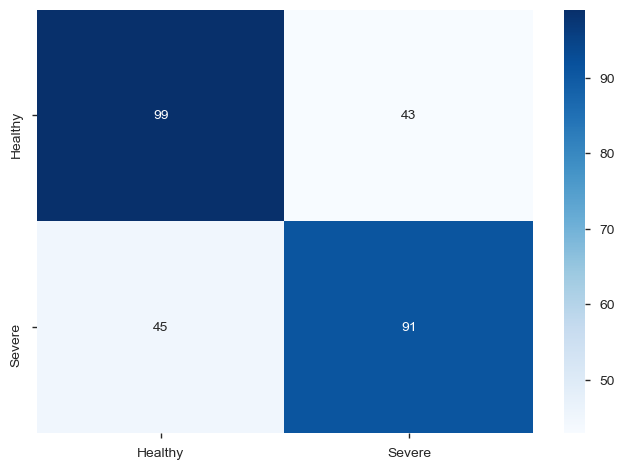


Ridge_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.70      0.70       142
      Severe       0.68      0.67      0.68       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.687
f1 score: 0.687
Confusion matrix


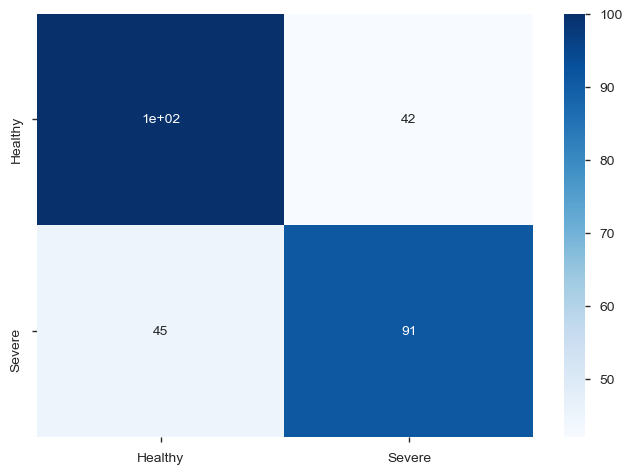


SGD_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.53      0.60       142
      Severe       0.61      0.77      0.68       136

    accuracy                           0.65       278
   macro avg       0.66      0.65      0.64       278
weighted avg       0.66      0.65      0.64       278

Balanced Accuracy: 0.650
f1 score: 0.642
Confusion matrix


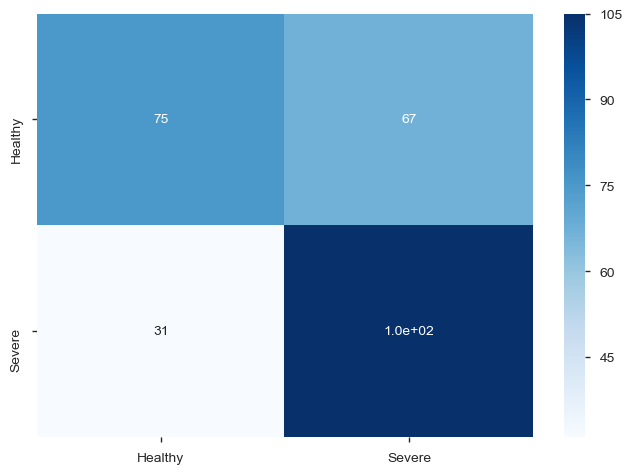


Perceptron
Classification Report
              precision    recall  f1-score   support

     Healthy       0.59      0.60      0.59       142
      Severe       0.57      0.57      0.57       136

    accuracy                           0.58       278
   macro avg       0.58      0.58      0.58       278
weighted avg       0.58      0.58      0.58       278

Balanced Accuracy: 0.582
f1 score: 0.583
Confusion matrix


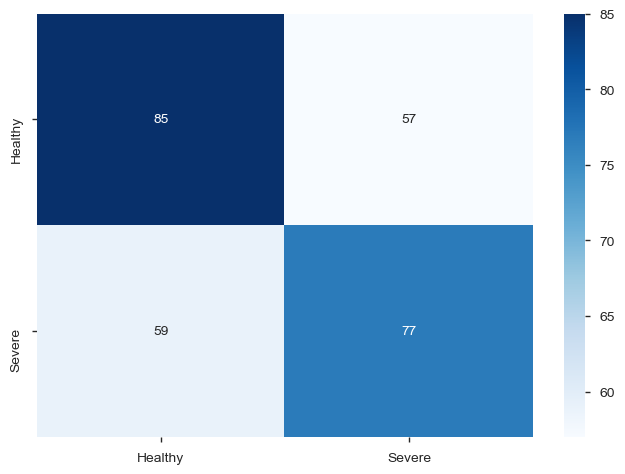


Passive_Aggressive_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.60      0.85      0.71       142
      Severe       0.73      0.41      0.53       136

    accuracy                           0.64       278
   macro avg       0.66      0.63      0.62       278
weighted avg       0.66      0.64      0.62       278

Balanced Accuracy: 0.632
f1 score: 0.618
Confusion matrix


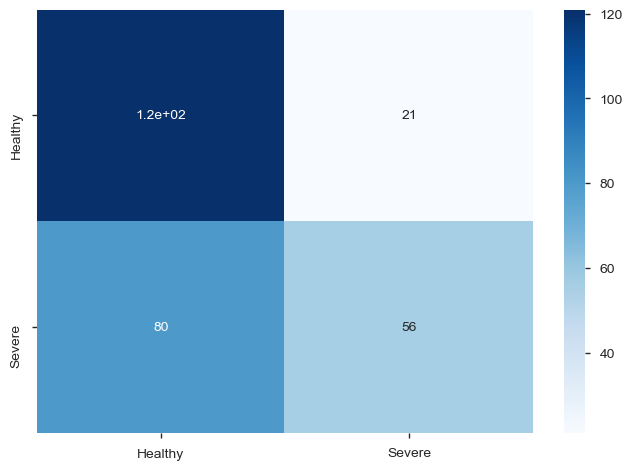


NaiveBayes_Bernoulli_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.46      0.63      0.54       142
      Severe       0.38      0.24      0.29       136

    accuracy                           0.44       278
   macro avg       0.42      0.43      0.41       278
weighted avg       0.42      0.44      0.42       278

Balanced Accuracy: 0.435
f1 score: 0.416
Confusion matrix


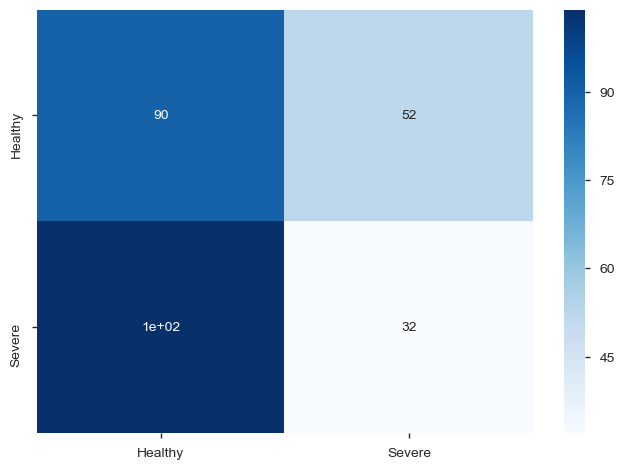

ValueError: Input X must be non-negative

In [45]:
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, auc, roc_curve, balanced_accuracy_score
from scipy import interp

for i in model_list:
    y_pred = cross_val_predict(model_list[i], X, y, cv=5)
    #y_pred_inv = (10**(y_pred))-1
    target_names = ['Healthy', 'Severe']
    print('\033[1m' + str(i) + '\033[0m')
    print('Classification Report')
    print(classification_report(y, y_pred, target_names=target_names))
    print('Balanced Accuracy: %.3f' % balanced_accuracy_score(y, y_pred))
    print('f1 score: %.3f' % f1_score(y, y_pred, average='weighted'))
    print('Confusion matrix')
    cm = confusion_matrix(y, y_pred)
    cmap = plt.cm.Blues
    plt.legend(target_names)
    hm = sns.heatmap(cm, annot=True, cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    bottom, top = hm.get_ylim()
    hm.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('')

In [46]:
model_list = {"Logistic_Regression_Classifier": linear_model.LogisticRegression(solver='liblinear'),
              "Ridge_Classifier": linear_model.RidgeClassifier(),
              "SGD_Classifier": linear_model.SGDClassifier(),
              "Perceptron": linear_model.Perceptron(tol=1e-3, random_state=0),
              "Passive_Aggressive_Classifier": linear_model.PassiveAggressiveClassifier(random_state=42),         
              "NaiveBayes_Bernoulli_Classifier": naive_bayes.BernoulliNB(),
              "NaiveBayes_Multinomial_Classifier": naive_bayes.MultinomialNB(),
              "SVM_Linear_Classifier": svm.LinearSVC(max_iter=100000), 
              "SVM_C-support_Classifier": svm.SVC(gamma='scale'),
              "SVM_Nu-support_Classifier": svm.NuSVC(gamma='scale'),
              "K-neighbors_Classifier": neighbors.KNeighborsClassifier(n_neighbors=5),
              "K-neighbors_Radius_Classifier": neighbors.RadiusNeighborsClassifier(radius=10000.0),
              "Neighbors_Nearest-Centroid_Classifier": neighbors.NearestCentroid(),
              "GaussianProcess_Classifier": gaussian_process.GaussianProcessClassifier(kernel=kernel,random_state=0),
              "AdaBoost_Classifier": ensemble.AdaBoostClassifier(),
              "Bagging_Classifier": ensemble.BaggingClassifier(),
              "Ensemble_ExtraTree_Classifier": ensemble.ExtraTreesClassifier(),
              "GradientBoost_Classifier": ensemble.GradientBoostingClassifier(),
              "Random_Forest_Classifier": ensemble.RandomForestClassifier(random_state=42, n_estimators=100),
              "Decision_Tree_Classifier": tree.DecisionTreeClassifier(),
              "ExtraTree_Classifier": tree.ExtraTreeClassifier(),
              "MLP_Classifier": neural_network.MLPClassifier(max_iter=200, early_stopping=True),
              "XGBoost_Classifier": xgboost.XGBClassifier(),
              "CatBoost_Classifier": catboost.CatBoostClassifier(verbose=False)
             }

## Results 2: Polynomial Features preprocessing

Logistic_Regression_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.68      0.65      0.67       142
      Severe       0.65      0.68      0.67       136

    accuracy                           0.67       278
   macro avg       0.67      0.67      0.67       278
weighted avg       0.67      0.67      0.67       278

Balanced Accuracy: 0.669
f1 score: 0.669
Confusion matrix


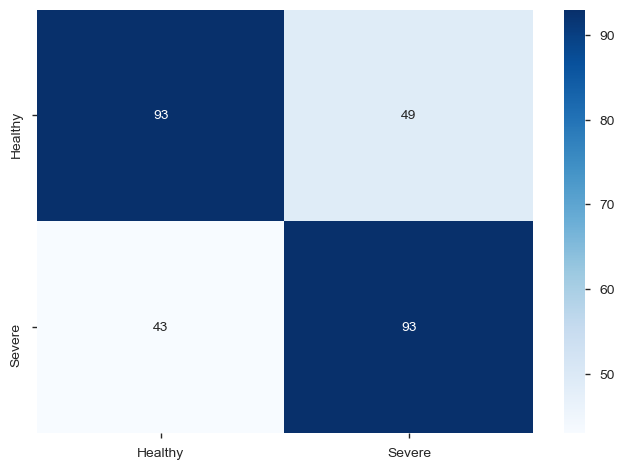


Ridge_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.65      0.63      0.64       142
      Severe       0.63      0.65      0.64       136

    accuracy                           0.64       278
   macro avg       0.64      0.64      0.64       278
weighted avg       0.64      0.64      0.64       278

Balanced Accuracy: 0.641
f1 score: 0.640
Confusion matrix


/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.16894e-17): result may not be accurate.
  overwrite_a=True).T
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.15222e-17): result may not be accurate.
  overwrite_a=True).T
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.13698e-17): result may not be accurate.
  overwrite_a=True).T
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.20072e-17): result may not be accurate.
  overwrite_a=True).T


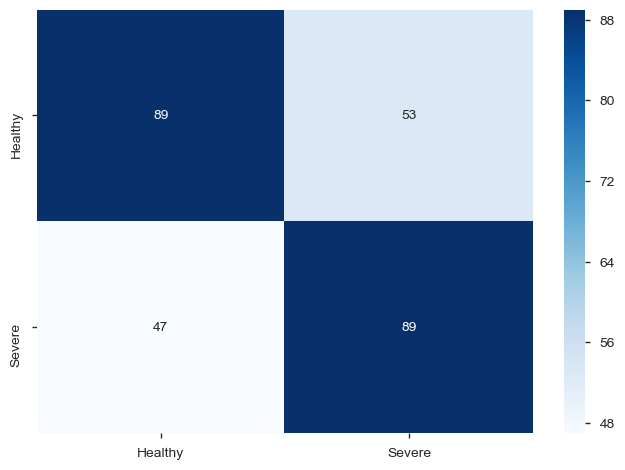


SGD_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.65      0.65      0.65       142
      Severe       0.64      0.64      0.64       136

    accuracy                           0.65       278
   macro avg       0.65      0.65      0.65       278
weighted avg       0.65      0.65      0.65       278

Balanced Accuracy: 0.647
f1 score: 0.647
Confusion matrix


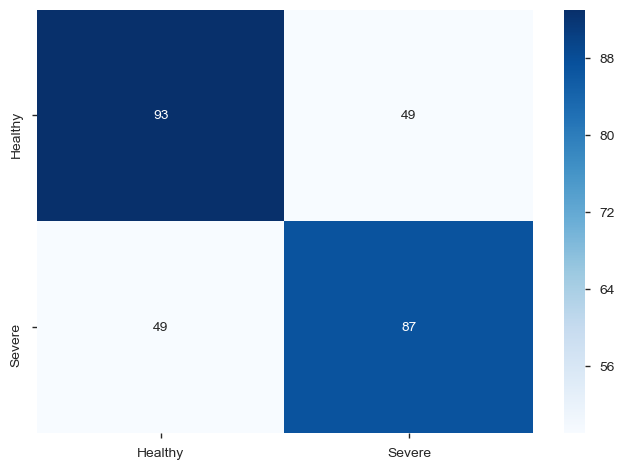


Perceptron
Classification Report
              precision    recall  f1-score   support

     Healthy       0.60      0.58      0.59       142
      Severe       0.58      0.60      0.59       136

    accuracy                           0.59       278
   macro avg       0.59      0.59      0.59       278
weighted avg       0.59      0.59      0.59       278

Balanced Accuracy: 0.590
f1 score: 0.590
Confusion matrix


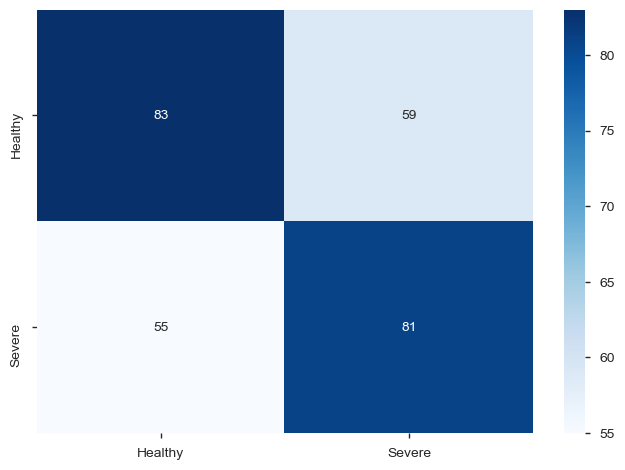


Passive_Aggressive_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.58      0.90      0.70       142
      Severe       0.75      0.31      0.44       136

    accuracy                           0.61       278
   macro avg       0.66      0.61      0.57       278
weighted avg       0.66      0.61      0.57       278

Balanced Accuracy: 0.605
f1 score: 0.573
Confusion matrix


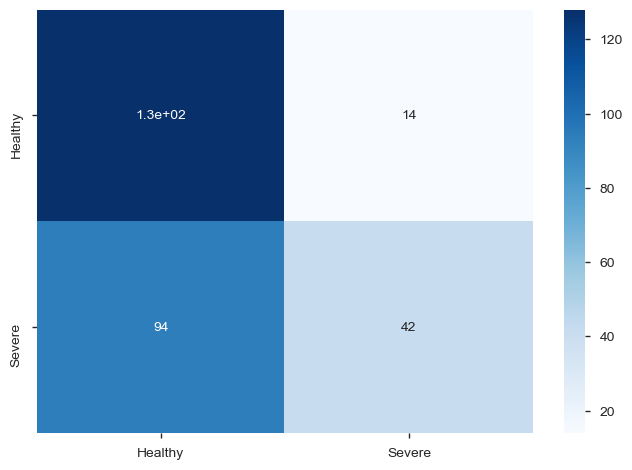


NaiveBayes_Bernoulli_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.43      0.39      0.41       142
      Severe       0.42      0.46      0.44       136

    accuracy                           0.42       278
   macro avg       0.42      0.42      0.42       278
weighted avg       0.42      0.42      0.42       278

Balanced Accuracy: 0.422
f1 score: 0.420
Confusion matrix


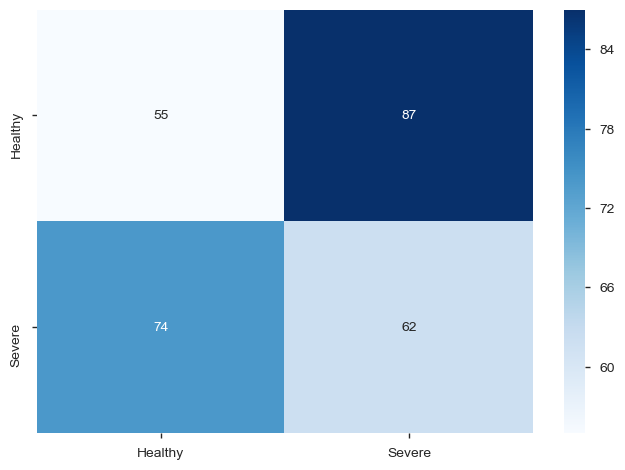

ValueError: Input X must be non-negative

In [47]:
for i in model_list:
    y_pred = cross_val_predict(model_list[i], X_poly, y, cv=5)
    #y_pred_inv = (10**(y_pred))-1
    target_names = ['Healthy', 'Severe']
    print('\033[1m' + str(i) + '\033[0m')
    print('Classification Report')
    print(classification_report(y, y_pred, target_names=target_names))
    print('Balanced Accuracy: %.3f' % balanced_accuracy_score(y, y_pred))
    print('f1 score: %.3f' % f1_score(y, y_pred, average='weighted'))
    print('Confusion matrix')
    cm = confusion_matrix(y, y_pred)
    cmap = plt.cm.Blues
    plt.legend(target_names)
    hm = sns.heatmap(cm, annot=True, cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    bottom, top = hm.get_ylim()
    hm.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('')


In [48]:
model_list = {"Logistic_Regression_Classifier": linear_model.LogisticRegression(solver='liblinear'),
              "Ridge_Classifier": linear_model.RidgeClassifier(),
              "SGD_Classifier": linear_model.SGDClassifier(),
              "Perceptron": linear_model.Perceptron(tol=1e-3, random_state=0),
              "Passive_Aggressive_Classifier": linear_model.PassiveAggressiveClassifier(random_state=42),         
              "NaiveBayes_Bernoulli_Classifier": naive_bayes.BernoulliNB(),
              #"NaiveBayes_Multinomial_Classifier": naive_bayes.MultinomialNB(),
              "SVM_Linear_Classifier": svm.LinearSVC(max_iter=1000), 
              "SVM_C-support_Classifier": svm.SVC(gamma='scale'),
              "SVM_Nu-support_Classifier": svm.NuSVC(gamma='scale'),
              "K-neighbors_Classifier": neighbors.KNeighborsClassifier(n_neighbors=5),
              "K-neighbors_Radius_Classifier": neighbors.RadiusNeighborsClassifier(radius=30.0),
              "Neighbors_Nearest-Centroid_Classifier": neighbors.NearestCentroid(),
              "GaussianProcess_Classifier": gaussian_process.GaussianProcessClassifier(kernel=kernel,random_state=0),
              "AdaBoost_Classifier": ensemble.AdaBoostClassifier(),
              "Bagging_Classifier": ensemble.BaggingClassifier(),
              "Ensemble_ExtraTree_Classifier": ensemble.ExtraTreesClassifier(n_estimators=100),
              "GradientBoost_Classifier": ensemble.GradientBoostingClassifier(),
              "Random_Forest_Classifier": ensemble.RandomForestClassifier(random_state=42, n_estimators=100),
              "Decision_Tree_Classifier": tree.DecisionTreeClassifier(),
              "ExtraTree_Classifier": tree.ExtraTreeClassifier(),
              "MLP_Classifier": neural_network.MLPClassifier(max_iter=500, early_stopping=True),
              "XGBoost_Classifier": xgboost.XGBClassifier(),
              "CatBoost_Classifier": catboost.CatBoostClassifier(verbose=False)
             }

## Results 3: Standard Scaler preprocessing

Logistic_Regression_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.71      0.70       142
      Severe       0.69      0.66      0.67       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.687
f1 score: 0.687
Confusion matrix


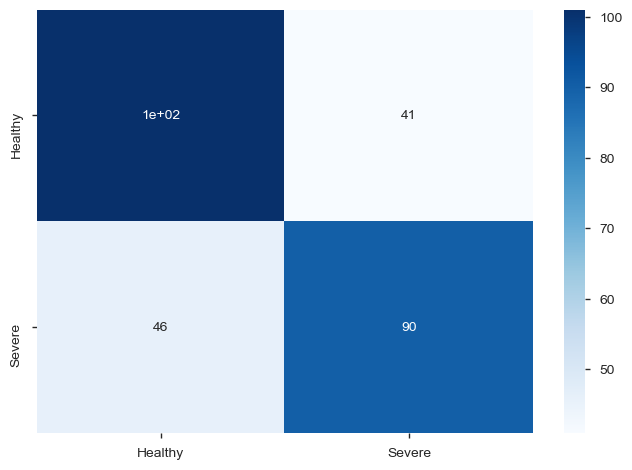


Ridge_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.68      0.70      0.69       142
      Severe       0.68      0.66      0.67       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.683
f1 score: 0.683
Confusion matrix


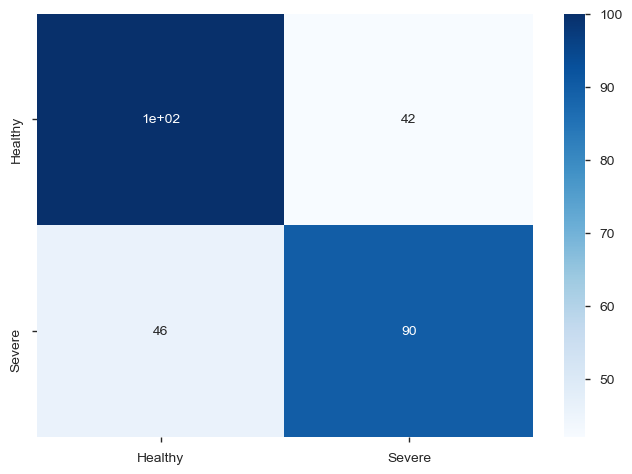


SGD_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.61      0.70      0.65       142
      Severe       0.63      0.52      0.57       136

    accuracy                           0.62       278
   macro avg       0.62      0.61      0.61       278
weighted avg       0.62      0.62      0.61       278

Balanced Accuracy: 0.613
f1 score: 0.612
Confusion matrix


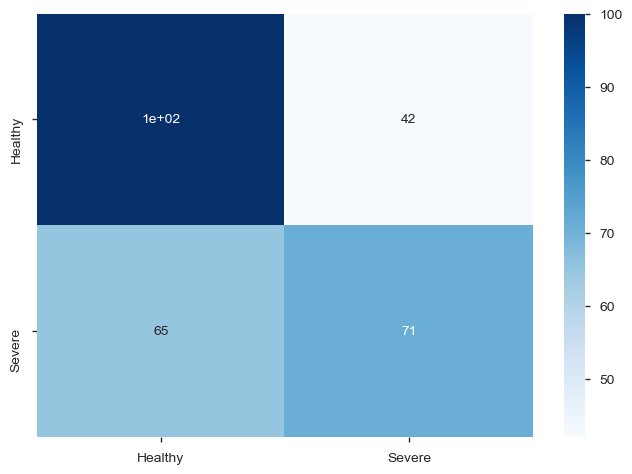


Perceptron
Classification Report
              precision    recall  f1-score   support

     Healthy       0.68      0.64      0.66       142
      Severe       0.65      0.69      0.67       136

    accuracy                           0.67       278
   macro avg       0.67      0.67      0.67       278
weighted avg       0.67      0.67      0.67       278

Balanced Accuracy: 0.666
f1 score: 0.665
Confusion matrix


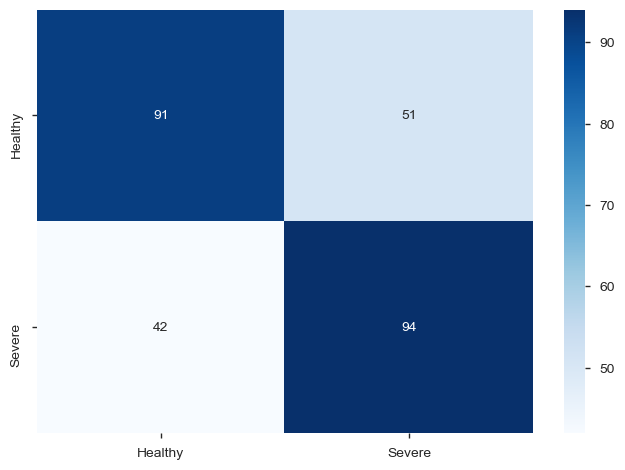


Passive_Aggressive_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.61      0.70      0.65       142
      Severe       0.63      0.52      0.57       136

    accuracy                           0.62       278
   macro avg       0.62      0.61      0.61       278
weighted avg       0.62      0.62      0.61       278

Balanced Accuracy: 0.613
f1 score: 0.612
Confusion matrix


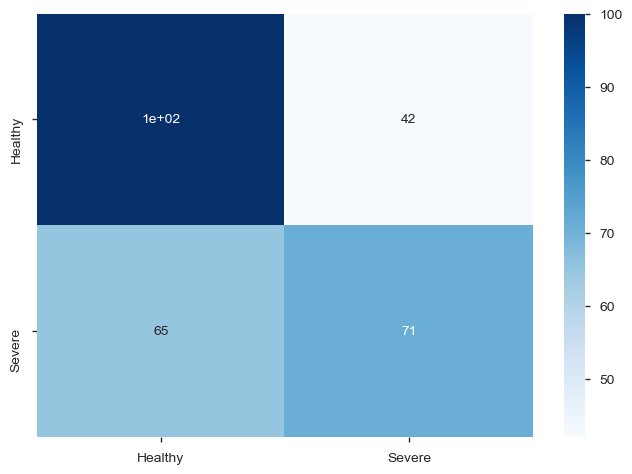


NaiveBayes_Bernoulli_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.70      0.66      0.68       142
      Severe       0.67      0.71      0.69       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.684
f1 score: 0.683
Confusion matrix


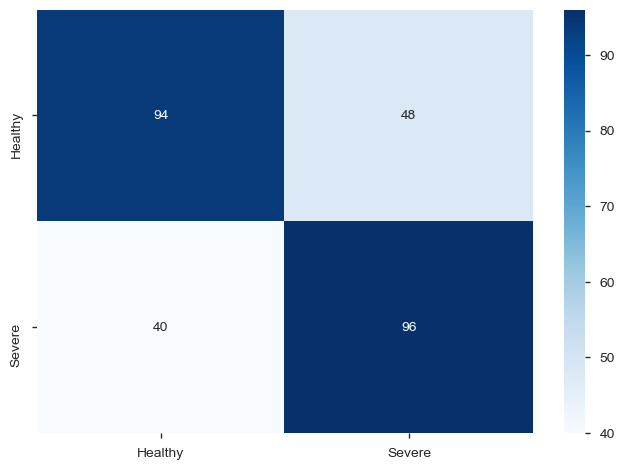


SVM_Linear_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.71      0.70       142
      Severe       0.69      0.66      0.67       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.687
f1 score: 0.687
Confusion matrix


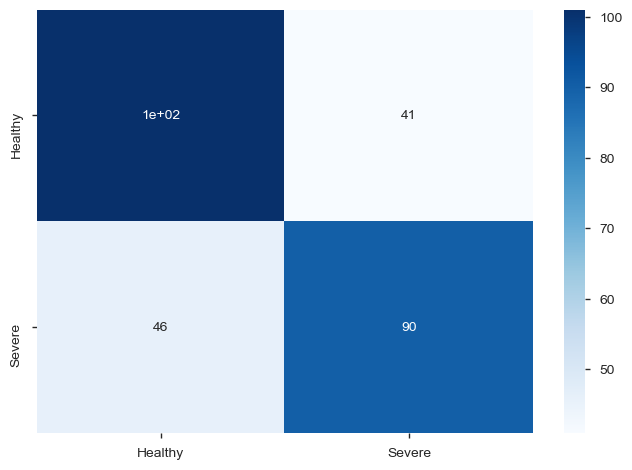


SVM_C-support_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.64      0.67       142
      Severe       0.66      0.72      0.69       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.681
f1 score: 0.679
Confusion matrix


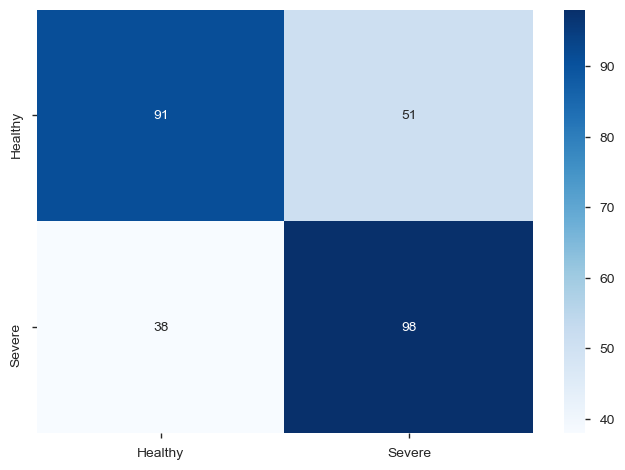


SVM_Nu-support_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.67      0.69       142
      Severe       0.68      0.72      0.70       136

    accuracy                           0.69       278
   macro avg       0.70      0.69      0.69       278
weighted avg       0.70      0.69      0.69       278

Balanced Accuracy: 0.695
f1 score: 0.694
Confusion matrix


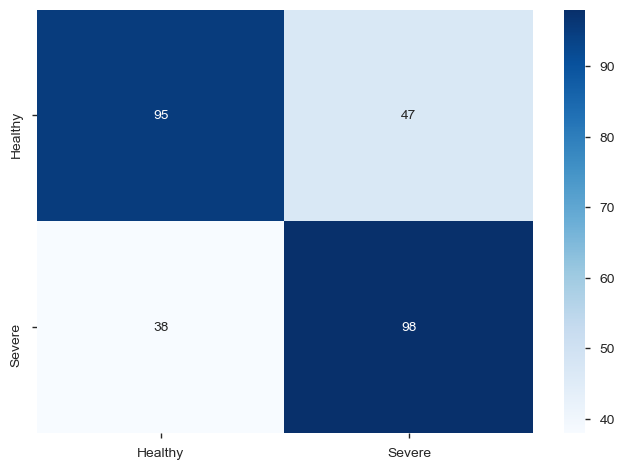


K-neighbors_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.68      0.65      0.67       142
      Severe       0.65      0.68      0.67       136

    accuracy                           0.67       278
   macro avg       0.67      0.67      0.67       278
weighted avg       0.67      0.67      0.67       278

Balanced Accuracy: 0.669
f1 score: 0.669
Confusion matrix


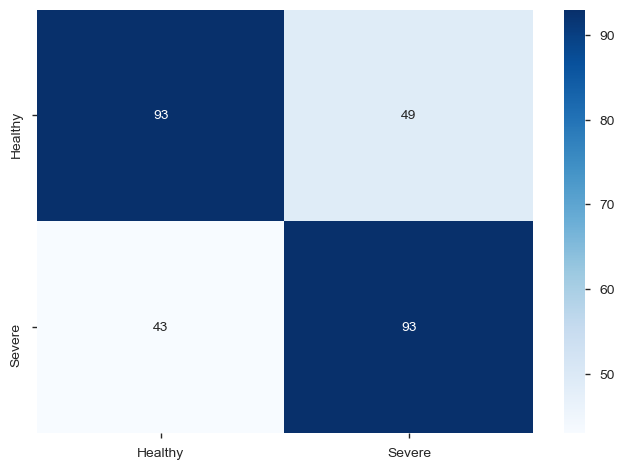


K-neighbors_Radius_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.51      1.00      0.68       142
      Severe       0.00      0.00      0.00       136

    accuracy                           0.51       278
   macro avg       0.26      0.50      0.34       278
weighted avg       0.26      0.51      0.35       278

Balanced Accuracy: 0.500
f1 score: 0.345
Confusion matrix


/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


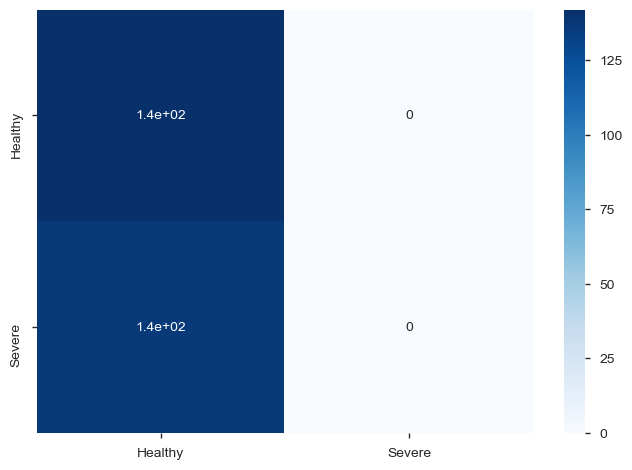


Neighbors_Nearest-Centroid_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.70      0.70      0.70       142
      Severe       0.69      0.69      0.69       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.694
f1 score: 0.694
Confusion matrix


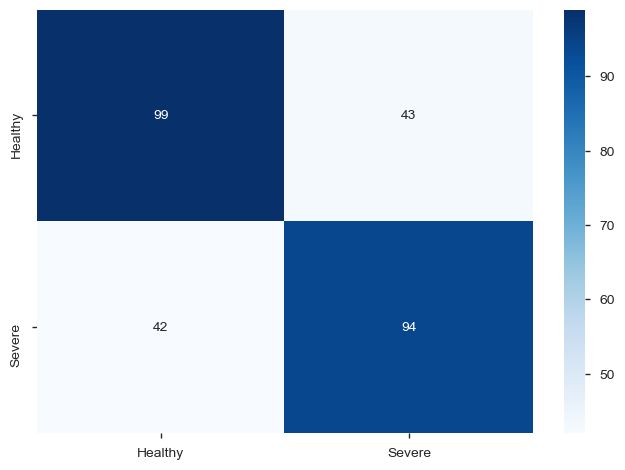


GaussianProcess_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.69      0.69       142
      Severe       0.68      0.68      0.68       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.683
f1 score: 0.683
Confusion matrix


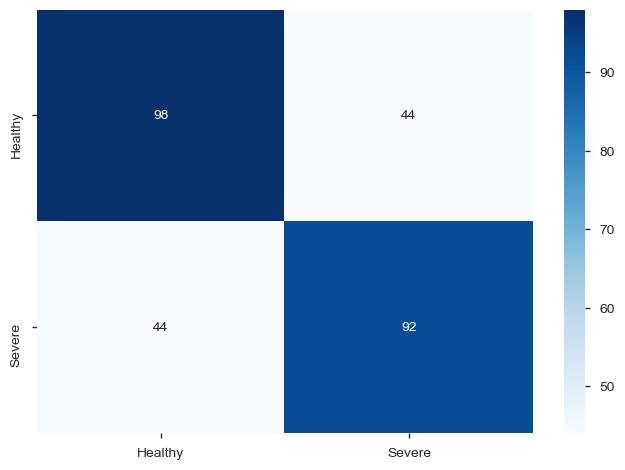


AdaBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.64      0.64      0.64       142
      Severe       0.62      0.62      0.62       136

    accuracy                           0.63       278
   macro avg       0.63      0.63      0.63       278
weighted avg       0.63      0.63      0.63       278

Balanced Accuracy: 0.629
f1 score: 0.629
Confusion matrix


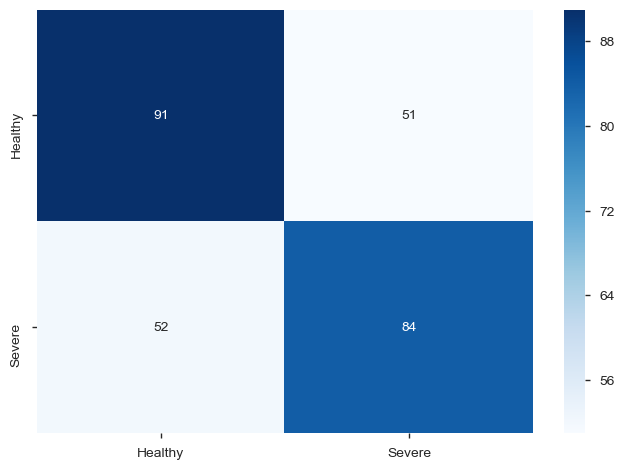


Bagging_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.71      0.70       142
      Severe       0.69      0.67      0.68       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.690
f1 score: 0.690
Confusion matrix


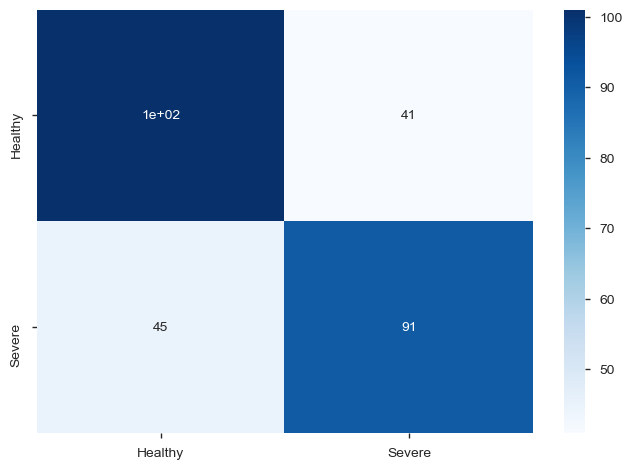


Ensemble_ExtraTree_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.72      0.68      0.70       142
      Severe       0.69      0.72      0.70       136

    accuracy                           0.70       278
   macro avg       0.70      0.70      0.70       278
weighted avg       0.70      0.70      0.70       278

Balanced Accuracy: 0.702
f1 score: 0.701
Confusion matrix


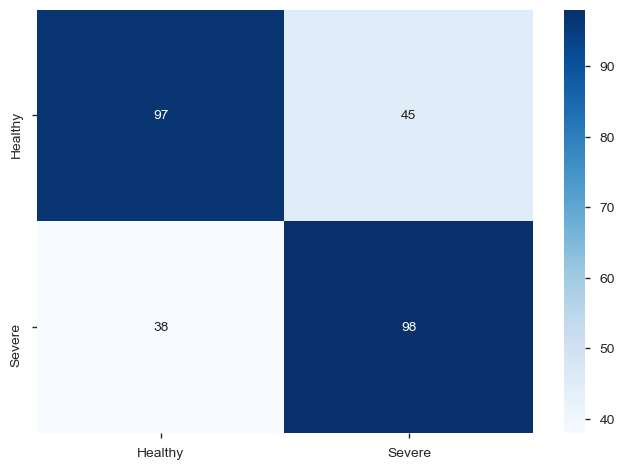


GradientBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.70      0.68      0.69       142
      Severe       0.67      0.69      0.68       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.684
f1 score: 0.683
Confusion matrix


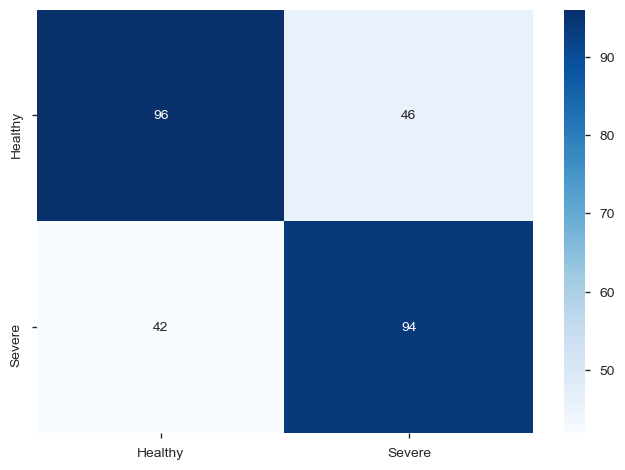


Random_Forest_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.72      0.71      0.71       142
      Severe       0.70      0.71      0.70       136

    accuracy                           0.71       278
   macro avg       0.71      0.71      0.71       278
weighted avg       0.71      0.71      0.71       278

Balanced Accuracy: 0.709
f1 score: 0.709
Confusion matrix


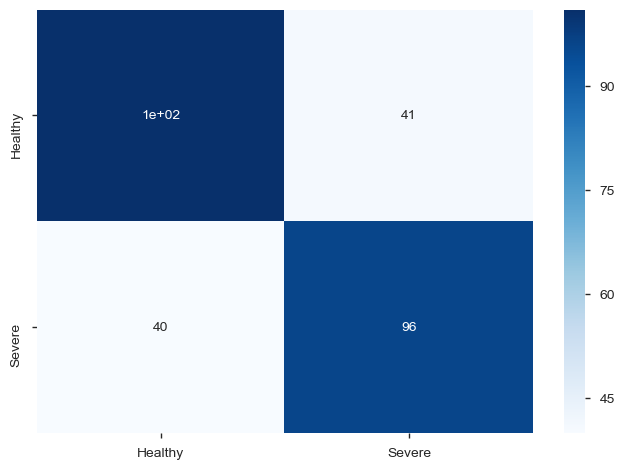


Decision_Tree_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.68      0.65      0.66       142
      Severe       0.65      0.68      0.67       136

    accuracy                           0.67       278
   macro avg       0.67      0.67      0.67       278
weighted avg       0.67      0.67      0.67       278

Balanced Accuracy: 0.666
f1 score: 0.665
Confusion matrix


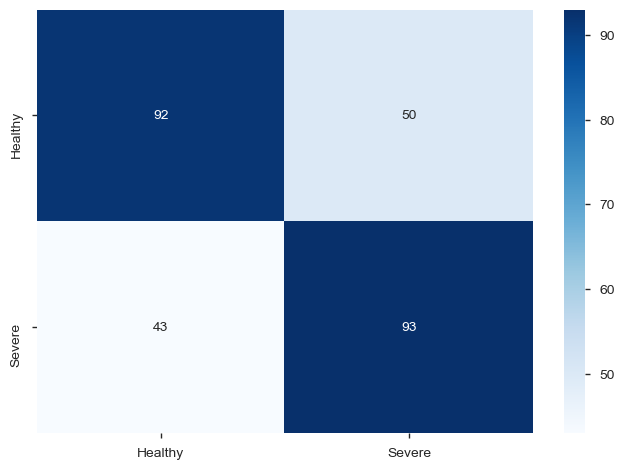


ExtraTree_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.62      0.64      0.63       142
      Severe       0.61      0.60      0.60       136

    accuracy                           0.62       278
   macro avg       0.62      0.62      0.62       278
weighted avg       0.62      0.62      0.62       278

Balanced Accuracy: 0.618
f1 score: 0.619
Confusion matrix


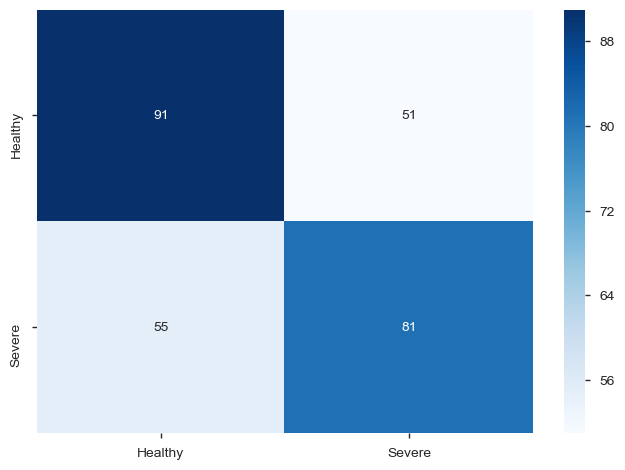


MLP_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.60      0.54      0.57       142
      Severe       0.57      0.63      0.60       136

    accuracy                           0.58       278
   macro avg       0.58      0.58      0.58       278
weighted avg       0.58      0.58      0.58       278

Balanced Accuracy: 0.584
f1 score: 0.582
Confusion matrix


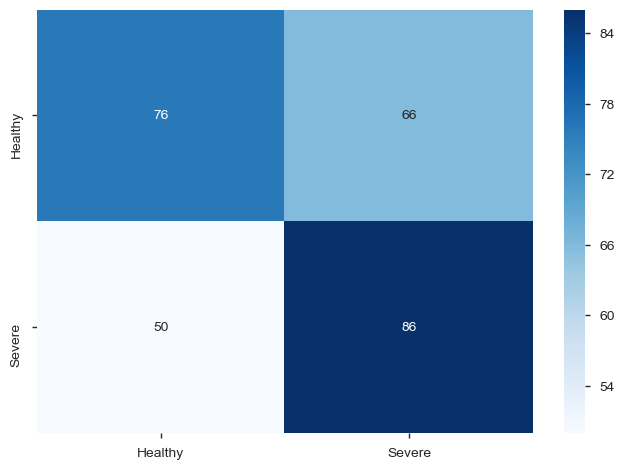


XGBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.67      0.68       142
      Severe       0.67      0.69      0.68       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.680
f1 score: 0.680
Confusion matrix


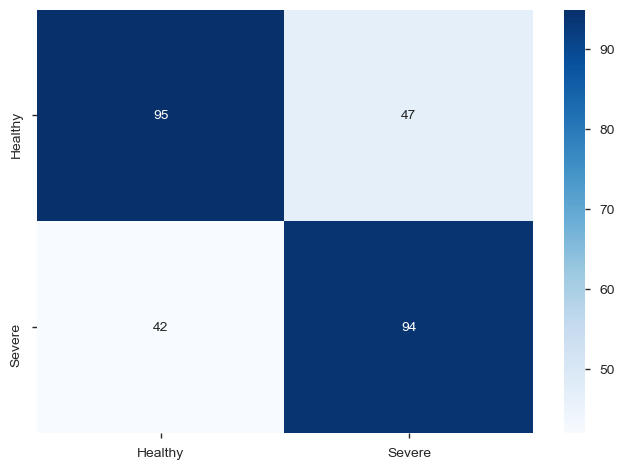


CatBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.70      0.71       142
      Severe       0.70      0.71      0.70       136

    accuracy                           0.71       278
   macro avg       0.70      0.71      0.70       278
weighted avg       0.71      0.71      0.71       278

Balanced Accuracy: 0.705
f1 score: 0.705
Confusion matrix


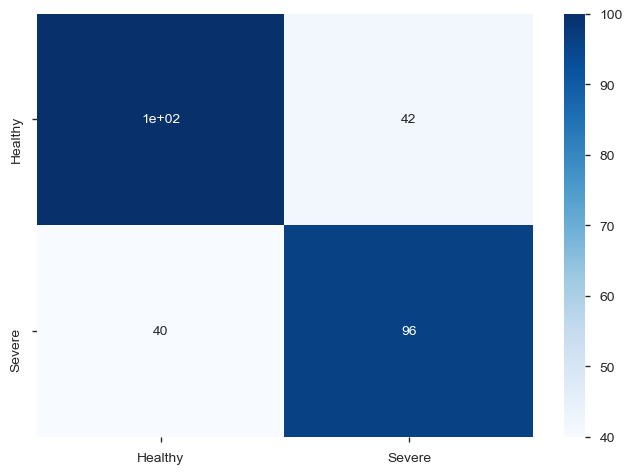

In [49]:
for i in model_list:
    y_pred = cross_val_predict(model_list[i], X_std_sc, y, cv=5)
    #y_pred_inv = (10**(y_pred))-1
    target_names = ['Healthy', 'Severe']
    print('\033[1m' + str(i) + '\033[0m')
    print('Classification Report')
    print(classification_report(y, y_pred, target_names=target_names))
    print('Balanced Accuracy: %.3f' % balanced_accuracy_score(y, y_pred))
    print('f1 score: %.3f' % f1_score(y, y_pred, average='weighted'))
    print('Confusion matrix')
    cm = confusion_matrix(y, y_pred)
    cmap = plt.cm.Blues
    plt.legend(target_names)
    hm = sns.heatmap(cm, annot=True, cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    bottom, top = hm.get_ylim()
    hm.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('')


## Results 4: MinMax Scaler preprocessing

Logistic_Regression_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.66      0.70      0.68       142
      Severe       0.66      0.62      0.64       136

    accuracy                           0.66       278
   macro avg       0.66      0.66      0.66       278
weighted avg       0.66      0.66      0.66       278

Balanced Accuracy: 0.657
f1 score: 0.658
Confusion matrix


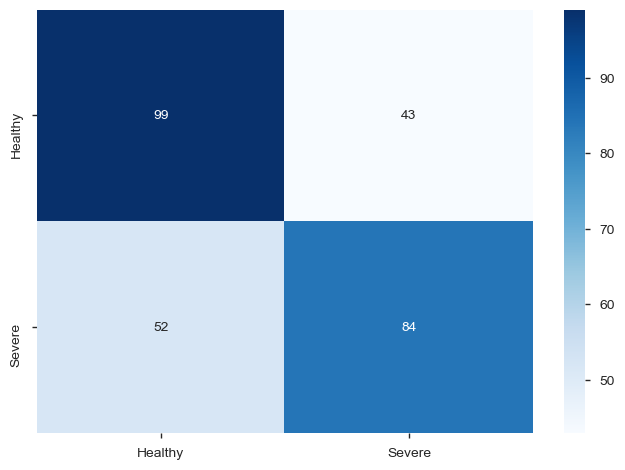


Ridge_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.65      0.70      0.68       142
      Severe       0.66      0.61      0.64       136

    accuracy                           0.66       278
   macro avg       0.66      0.66      0.66       278
weighted avg       0.66      0.66      0.66       278

Balanced Accuracy: 0.657
f1 score: 0.657
Confusion matrix


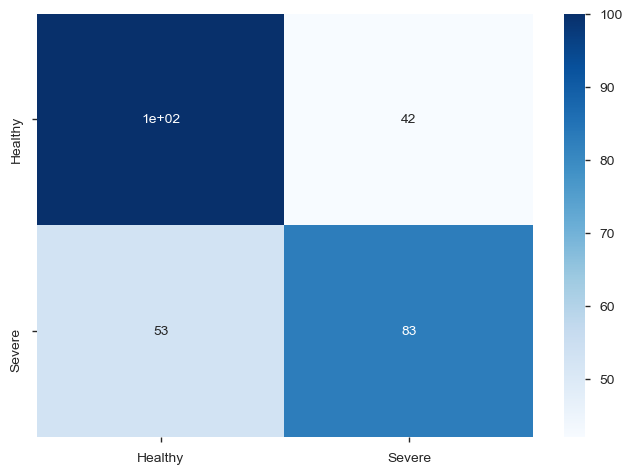


SGD_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.80      0.51      0.62       142
      Severe       0.63      0.87      0.73       136

    accuracy                           0.68       278
   macro avg       0.71      0.69      0.67       278
weighted avg       0.72      0.68      0.67       278

Balanced Accuracy: 0.687
f1 score: 0.673
Confusion matrix


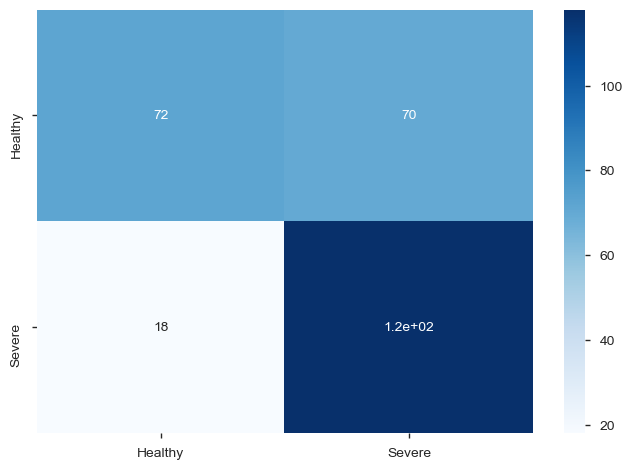


Perceptron
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.35      0.47       142
      Severe       0.56      0.85      0.67       136

    accuracy                           0.60       278
   macro avg       0.64      0.60      0.57       278
weighted avg       0.64      0.60      0.57       278

Balanced Accuracy: 0.603
f1 score: 0.571
Confusion matrix


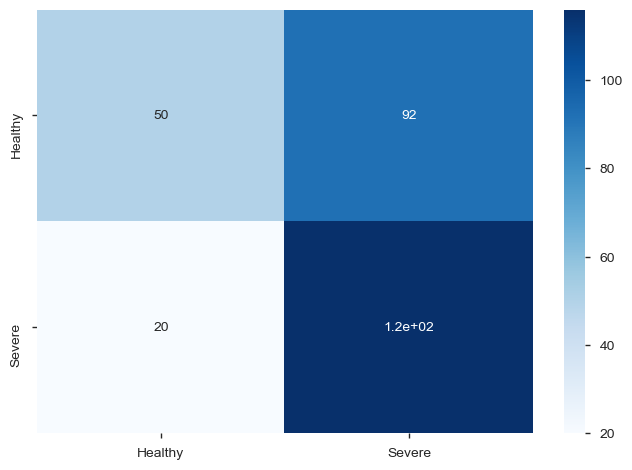


Passive_Aggressive_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.60      0.77      0.67       142
      Severe       0.66      0.46      0.54       136

    accuracy                           0.62       278
   macro avg       0.63      0.62      0.61       278
weighted avg       0.63      0.62      0.61       278

Balanced Accuracy: 0.615
f1 score: 0.609
Confusion matrix


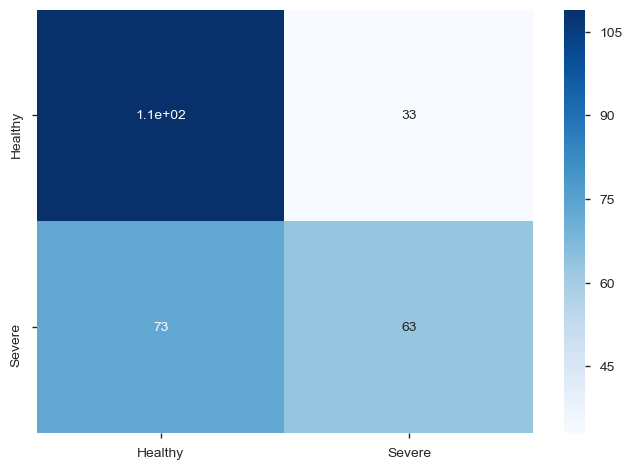


NaiveBayes_Bernoulli_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.46      0.63      0.54       142
      Severe       0.38      0.24      0.29       136

    accuracy                           0.44       278
   macro avg       0.42      0.43      0.41       278
weighted avg       0.42      0.44      0.42       278

Balanced Accuracy: 0.435
f1 score: 0.416
Confusion matrix


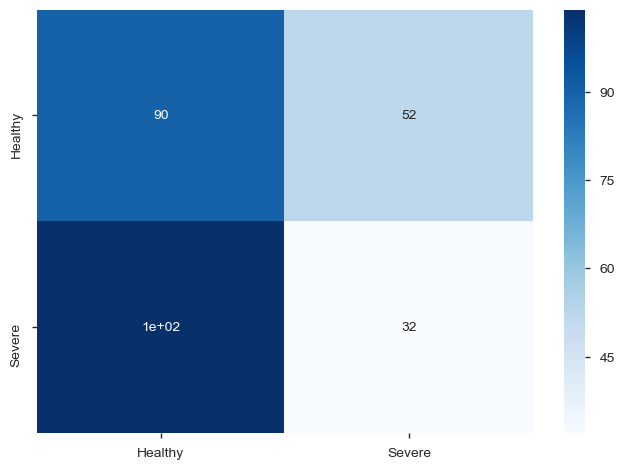


SVM_Linear_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.68      0.70      0.69       142
      Severe       0.68      0.65      0.66       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.676
f1 score: 0.676
Confusion matrix


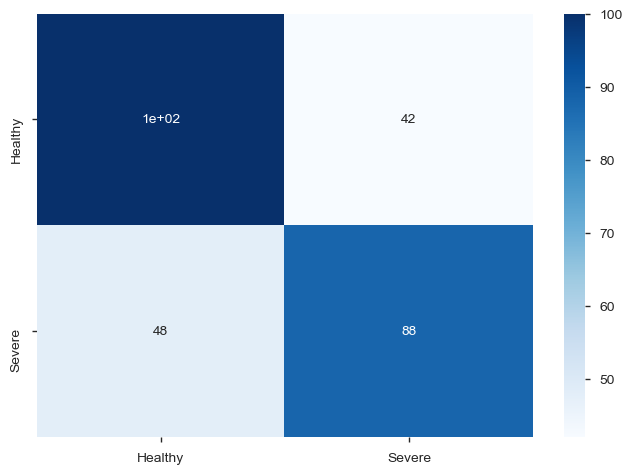


SVM_C-support_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.67      0.68       142
      Severe       0.66      0.68      0.67       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.676
f1 score: 0.676
Confusion matrix


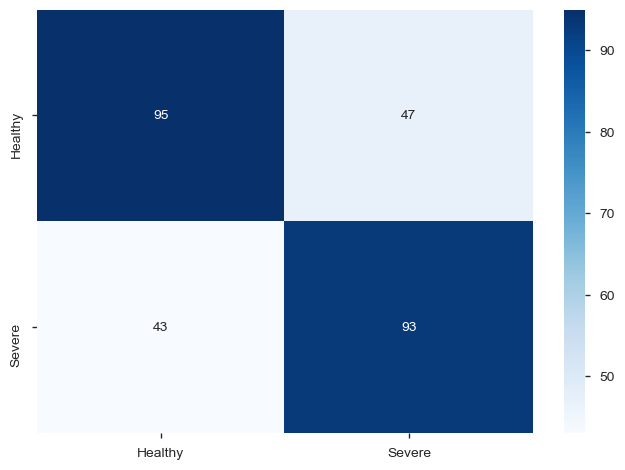


SVM_Nu-support_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.66      0.64      0.65       142
      Severe       0.64      0.66      0.65       136

    accuracy                           0.65       278
   macro avg       0.65      0.65      0.65       278
weighted avg       0.65      0.65      0.65       278

Balanced Accuracy: 0.651
f1 score: 0.651
Confusion matrix


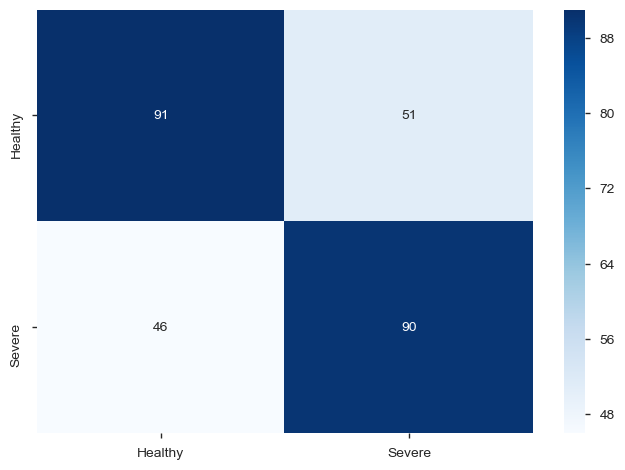


K-neighbors_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.67      0.64      0.66       142
      Severe       0.64      0.68      0.66       136

    accuracy                           0.66       278
   macro avg       0.66      0.66      0.66       278
weighted avg       0.66      0.66      0.66       278

Balanced Accuracy: 0.659
f1 score: 0.658
Confusion matrix


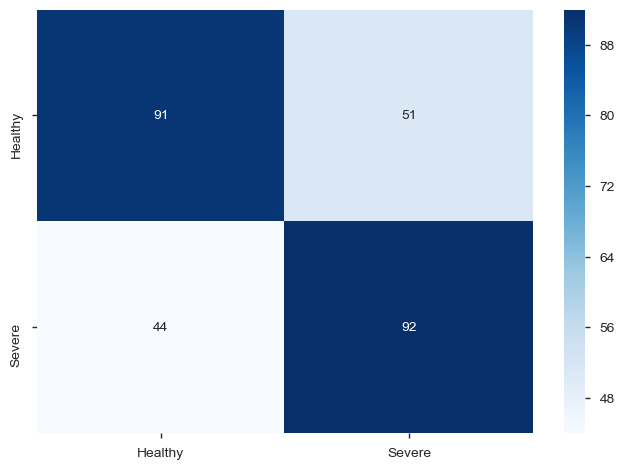


K-neighbors_Radius_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.51      1.00      0.68       142
      Severe       0.00      0.00      0.00       136

    accuracy                           0.51       278
   macro avg       0.26      0.50      0.34       278
weighted avg       0.26      0.51      0.35       278

Balanced Accuracy: 0.500
f1 score: 0.345
Confusion matrix


/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


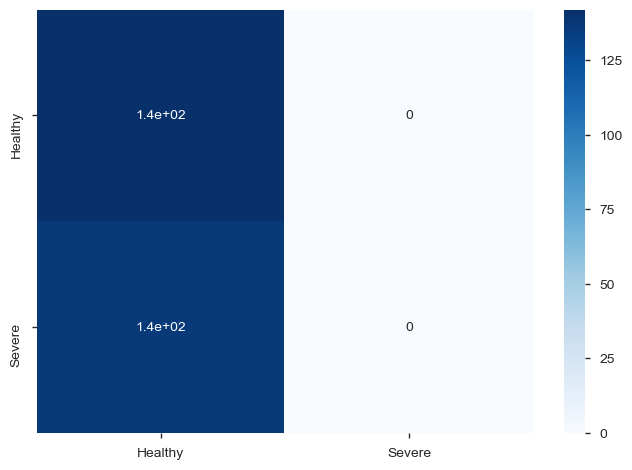


Neighbors_Nearest-Centroid_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.62      0.67      0.65       142
      Severe       0.63      0.58      0.60       136

    accuracy                           0.63       278
   macro avg       0.63      0.62      0.62       278
weighted avg       0.63      0.63      0.63       278

Balanced Accuracy: 0.625
f1 score: 0.625
Confusion matrix


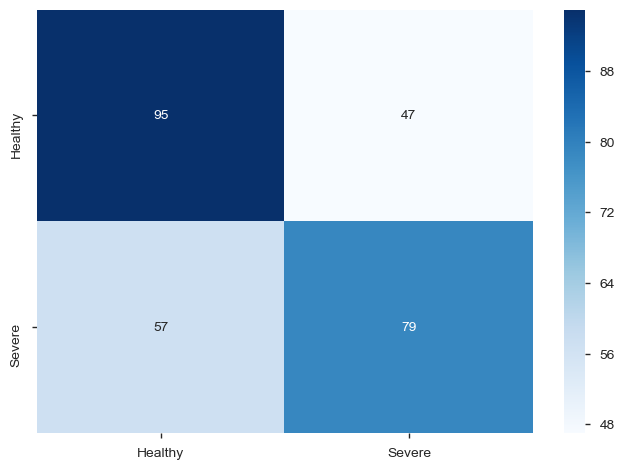


GaussianProcess_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.65      0.70      0.67       142
      Severe       0.66      0.61      0.63       136

    accuracy                           0.65       278
   macro avg       0.66      0.65      0.65       278
weighted avg       0.65      0.65      0.65       278

Balanced Accuracy: 0.654
f1 score: 0.654
Confusion matrix


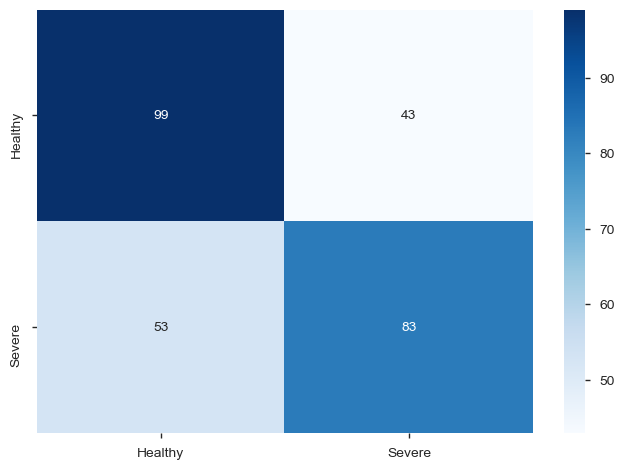


AdaBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.63      0.63      0.63       142
      Severe       0.62      0.62      0.62       136

    accuracy                           0.63       278
   macro avg       0.63      0.63      0.63       278
weighted avg       0.63      0.63      0.63       278

Balanced Accuracy: 0.626
f1 score: 0.626
Confusion matrix


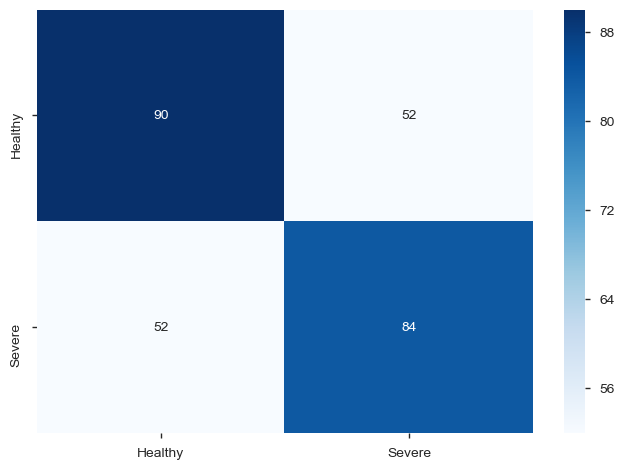


Bagging_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.70      0.73      0.71       142
      Severe       0.70      0.68      0.69       136

    accuracy                           0.70       278
   macro avg       0.70      0.70      0.70       278
weighted avg       0.70      0.70      0.70       278

Balanced Accuracy: 0.701
f1 score: 0.701
Confusion matrix


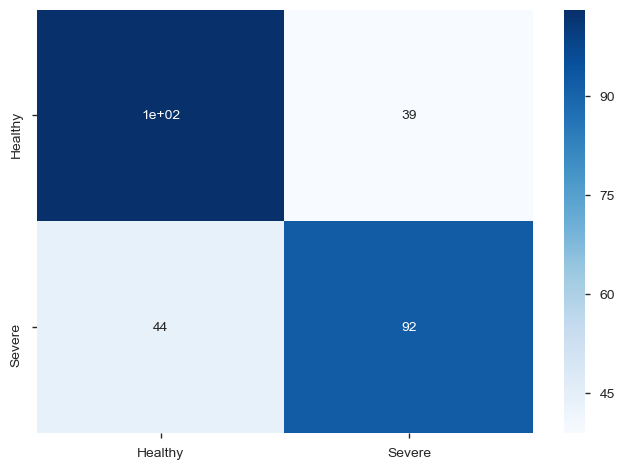


Ensemble_ExtraTree_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.73      0.72       142
      Severe       0.70      0.68      0.69       136

    accuracy                           0.71       278
   macro avg       0.71      0.70      0.70       278
weighted avg       0.71      0.71      0.70       278

Balanced Accuracy: 0.705
f1 score: 0.705
Confusion matrix


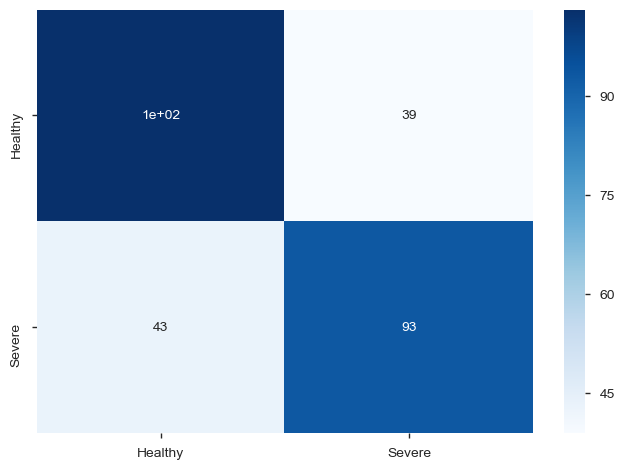


GradientBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.65      0.67       142
      Severe       0.66      0.70      0.68       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.677
f1 score: 0.676
Confusion matrix


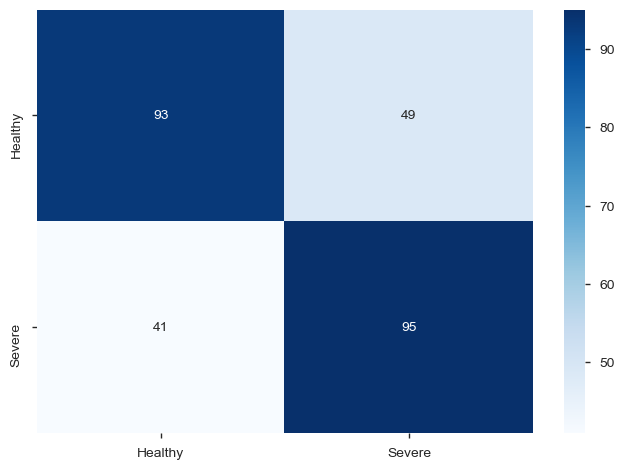


Random_Forest_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.72      0.71      0.71       142
      Severe       0.70      0.71      0.70       136

    accuracy                           0.71       278
   macro avg       0.71      0.71      0.71       278
weighted avg       0.71      0.71      0.71       278

Balanced Accuracy: 0.709
f1 score: 0.709
Confusion matrix


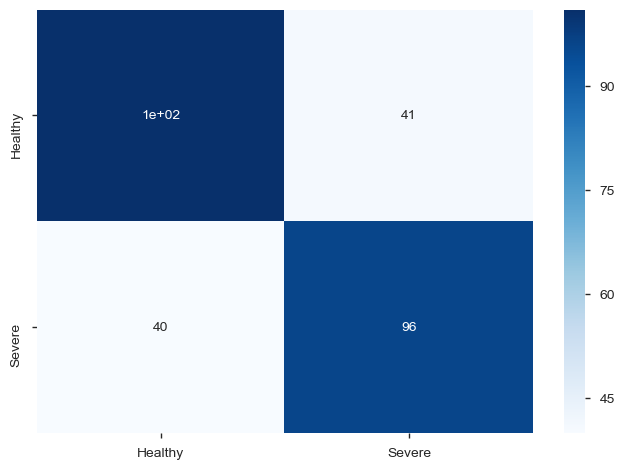


Decision_Tree_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.66      0.68       142
      Severe       0.67      0.71      0.69       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.688
f1 score: 0.687
Confusion matrix


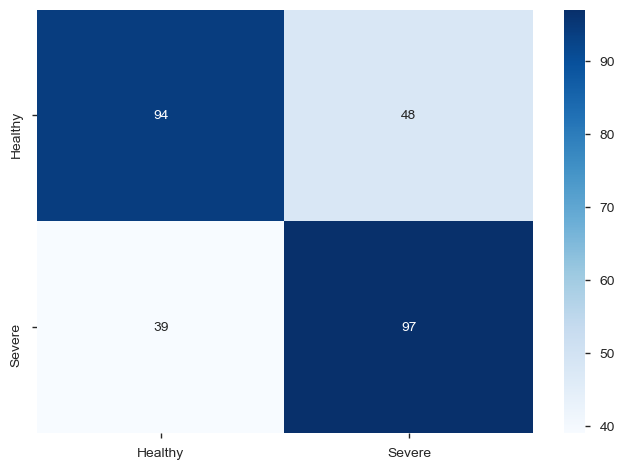


ExtraTree_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.62      0.60      0.61       142
      Severe       0.59      0.61      0.60       136

    accuracy                           0.60       278
   macro avg       0.60      0.60      0.60       278
weighted avg       0.60      0.60      0.60       278

Balanced Accuracy: 0.604
f1 score: 0.604
Confusion matrix


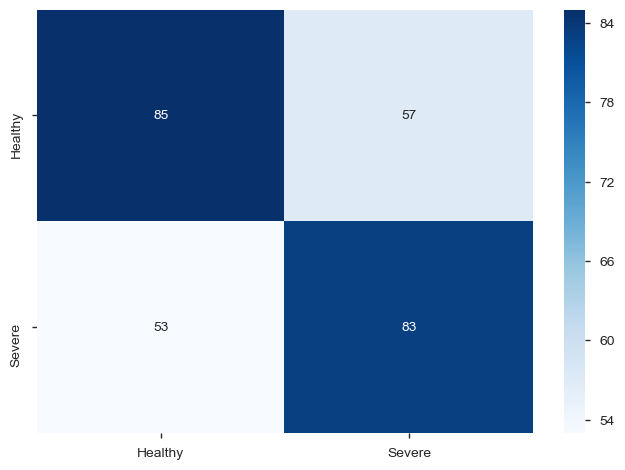


MLP_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.47      0.19      0.27       142
      Severe       0.48      0.78      0.59       136

    accuracy                           0.48       278
   macro avg       0.48      0.48      0.43       278
weighted avg       0.48      0.48      0.43       278

Balanced Accuracy: 0.485
f1 score: 0.429
Confusion matrix


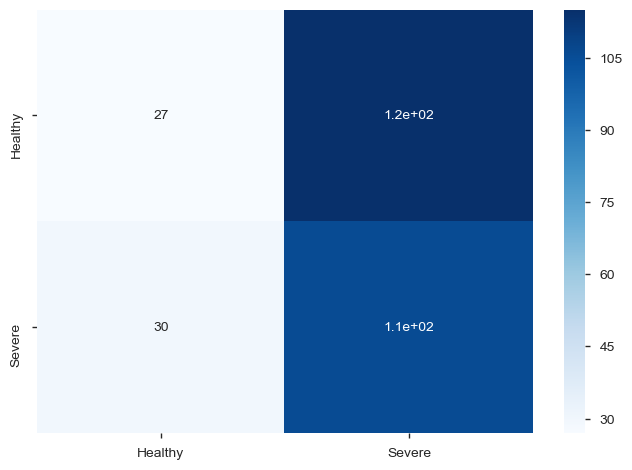


XGBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.70      0.65      0.68       142
      Severe       0.66      0.71      0.68       136

    accuracy                           0.68       278
   macro avg       0.68      0.68      0.68       278
weighted avg       0.68      0.68      0.68       278

Balanced Accuracy: 0.680
f1 score: 0.680
Confusion matrix


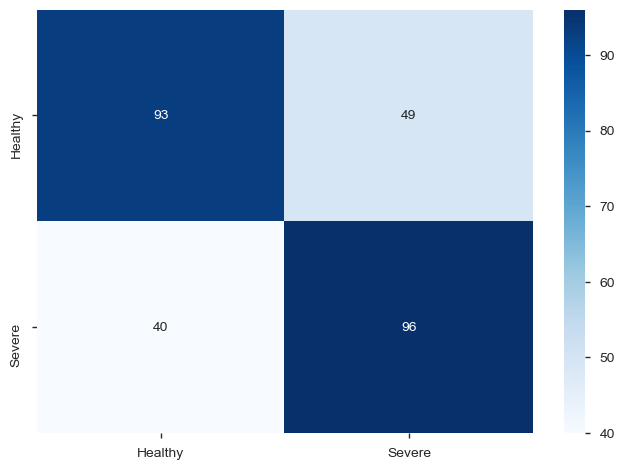


CatBoost_Classifier
Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      0.69      0.70       142
      Severe       0.68      0.70      0.69       136

    accuracy                           0.69       278
   macro avg       0.69      0.69      0.69       278
weighted avg       0.69      0.69      0.69       278

Balanced Accuracy: 0.694
f1 score: 0.694
Confusion matrix


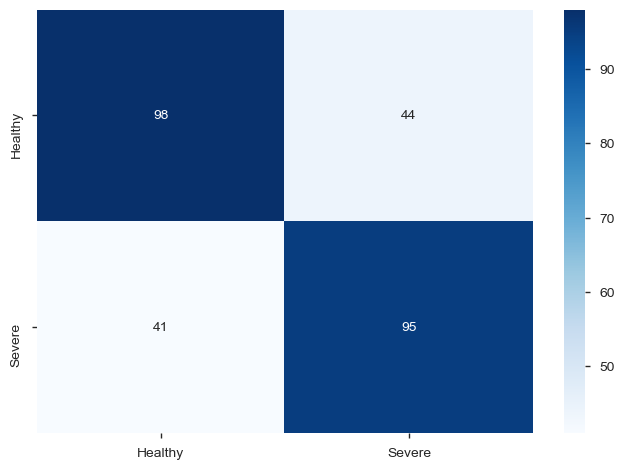

In [50]:
for i in model_list:
    y_pred = cross_val_predict(model_list[i], X_sc, y, cv=5)
    #y_pred_inv = (10**(y_pred))-1
    target_names = ['Healthy', 'Severe']
    print('\033[1m' + str(i) + '\033[0m')
    print('Classification Report')
    print(classification_report(y, y_pred, target_names=target_names))
    print('Balanced Accuracy: %.3f' % balanced_accuracy_score(y, y_pred))
    print('f1 score: %.3f' % f1_score(y, y_pred, average='weighted'))
    print('Confusion matrix')
    cm = confusion_matrix(y, y_pred)
    cmap = plt.cm.Blues
    plt.legend(target_names)
    hm = sns.heatmap(cm, annot=True, cmap=cmap, xticklabels=target_names, yticklabels=target_names)
    bottom, top = hm.get_ylim()
    hm.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    print('')


## ROC-AUC curve for the best models

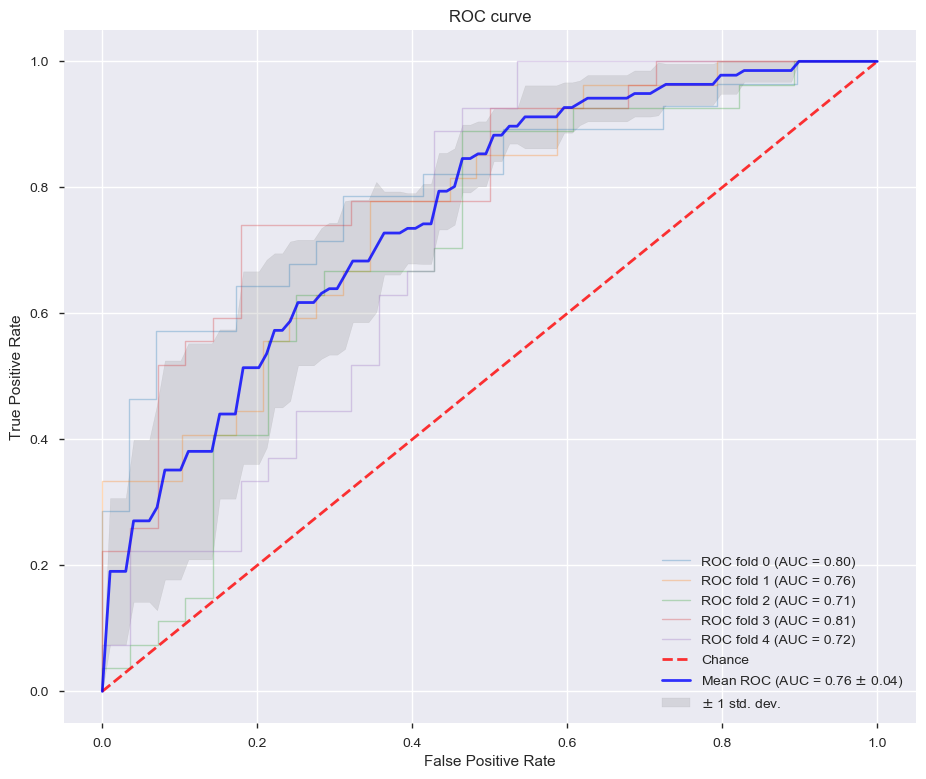

In [51]:
# neighbors.KNeighborsClassifier(n_neighbors=5)
# ensemble.RandomForestClassifier(random_state=42, n_estimators=100)
# catboost.CatBoostClassifier(verbose=False)
best_model = catboost.CatBoostClassifier(verbose=False)
cv = StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
j=0
plt.figure(figsize=(11,9))
for train, test in cv.split(X, y):
    probas_ = best_model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (j, roc_auc))
    j += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()